# Saumya Kothari - Computer Vision Project 2

# Part 1

#### DOMAIN: 
Entertainment


#### CONTEXT: 
Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the
movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision
and multimedia experts who need to detect faces from screen shots from the movie scene.


#### DATA DESCRIPTION: 
The dataset comprises of images and its mask where there is a human face.

Acknowledgement for the dataset http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/

Mobile Net paper: https://arxiv.org/pdf/1704.04861.pdf


#### PROJECT OBJECTIVE: 
Face detection from training images.
Steps and tasks: [ Total Score: 20 points]
1. Import the dataset.
2. Create features (images) and labels (mask) using that data.
3. Mask detection model:
● Design a face mask detection model.
 Hint: Use U-net along with pre-trained transfer learning models
● Design your own Dice Coefficient and Loss function.
● Train, tune and test the model.
● Evaluate the model using testing data.
4. Use the “Prediction image” as an input to your designed model and display the output of the image.

#### Check Current Working Directory to project folder 

In [1]:
import os
os.getcwd()

'C:\\Users\\Dell\\Desktop'

#### Load the required Images file (with the .npy extension)
This file contains images with details of bounding boxes

In [2]:
import numpy as np
data = np.load('Part 1- Train data - images.npy', allow_pickle = True)

#### Image Loaded

[[[  4   0   1]
  [  0   3   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   2]
  [  5   1   2]]

 [[  0   2   1]
  [ 69  81  71]
  [ 72  79  71]
  ...
  [111 121 122]
  [113 122 121]
  [  0   0   0]]

 [[  0   0   0]
  [ 71  83  71]
  [ 70  81  67]
  ...
  [113 123 125]
  [114 122 124]
  [  0   0   0]]

 ...

 [[  0   3   0]
  [ 68  76  65]
  [ 67  78  62]
  ...
  [145 155 120]
  [133 143 106]
  [  0   1   3]]

 [[  1   1   0]
  [ 69  72  61]
  [ 67  73  59]
  ...
  [148 155 121]
  [137 145 104]
  [  0   1   3]]

 [[  1   1   3]
  [  1   1   1]
  [  0   0   2]
  ...
  [  0   0   0]
  [  0   0   2]
  [  0   0   0]]]


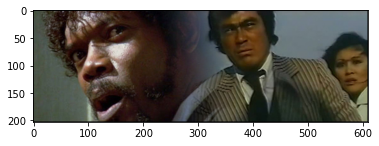

In [3]:
import matplotlib.pyplot as plt
import cv2
print(data[70][0])
plt.imshow(data[70][0])

#### Mask

In [4]:
data[70][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.05901639344262295, 'y': 0.04433497536945813},
   {'x': 0.460655737704918, 'y': 0.9753694581280788}],
  'imageWidth': 610,
  'imageHeight': 203},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5131147540983606, 'y': 0.04926108374384237},
   {'x': 0.760655737704918, 'y': 0.5812807881773399}],
  'imageWidth': 610,
  'imageHeight': 203},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.8967213114754098, 'y': 0.2315270935960591},
   {'x': 1, 'y': 0.6600985221674877}],
  'imageWidth': 610,
  'imageHeight': 203}]

#### Set image dimensions (2 marks)
Initialize image height, image width with value: 224

In [5]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

#### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [6]:
import tensorflow as tf
print('TensorFlow Version: ', tf.__version__)
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype = np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

TensorFlow Version:  2.4.1


#### Printing the shape of X_train and Mask array

In [7]:
print('Shape of X_train: ', X_train.shape)

Shape of X_train:  (409, 224, 224, 3)


In [8]:
print('Shape of mask array: ', masks.shape)

Shape of mask array:  (409, 224, 224)


#### Print a sample image and image array

[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


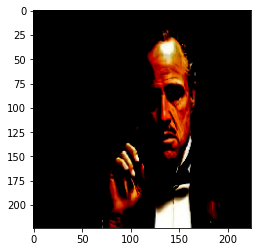

In [9]:
n = 10
print(X_train[n])
plt.imshow(X_train[n])

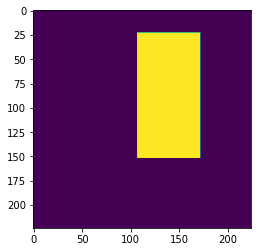

In [10]:
plt.imshow(masks[n])

### Creating the model

1. Add MobileNet as model with below parameter values
- input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
- include_top: False
- alpha: 1.0
- weights: "imagenet"

2. Add UNET architecture layers
- This is the trickiest part of the project, you need to research and implement it correctly

In [11]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [12]:
def create_model(trainable = True):
    IMG_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)
    model = MobileNet(input_shape = IMG_SHAPE, alpha = 1.0, include_top = False, weights = 'imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer('conv_pw_1_relu').output
    block1 = model.get_layer('conv_pw_3_relu').output
    block2 = model.get_layer('conv_pw_5_relu').output
    block3 = model.get_layer('conv_pw_11_relu').output
    block4 = model.get_layer('conv_pw_13_relu').output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size = 1, activation = "sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs = model.input, outputs = x)

#### Calling the create_model function

In [13]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

17227776/17225924 [==============================] - 22s 1us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
____________________________

#### Define Dice Coefficient function

In [14]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

#### Define Loss function

In [15]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

#### Compile the model (5 marks)
Complie the model using below parameters
- loss: use the loss function defined above
- optimizers: use Adam optimizer
- metrics: use dice_coefficient function defined above

In [16]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

#### Define checkpoint and earlystopping

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

#### Fit the model
Fit the model using below parameters
- epochs: you can decide
- batch_size: 1
- callbacks: checkpoint, reduce_lr, stop

In [18]:
model.fit(X_train, masks, epochs = 10, batch_size = 1, validation_split = 0.1,  #splitting 10% of data into validation set          
                    callbacks = [checkpoint, reduce_lr, stop],
                    workers = 8,
                    use_multiprocessing = True,                    
                    verbose = 1)

Epoch 1/10
  1/368 [..............................] - ETA: 1:55:44 - loss: 2.2842 - dice_coefficient: 0.2282
Epoch 00001: loss improved from inf to 2.28418, saving model to model-2.28.h5
  2/368 [..............................] - ETA: 42:07 - loss: 2.0024 - dice_coefficient: 0.3114  
Epoch 00001: loss improved from 2.28418 to 1.72061, saving model to model-1.72.h5
  3/368 [..............................] - ETA: 28:08 - loss: 1.9873 - dice_coefficient: 0.3155
Epoch 00001: loss did not improve from 1.72061
  4/368 [..............................] - ETA: 21:58 - loss: 2.0618 - dice_coefficient: 0.3031
Epoch 00001: loss did not improve from 1.72061
  5/368 [..............................] - ETA: 18:51 - loss: 2.0816 - dice_coefficient: 0.2987
Epoch 00001: loss did not improve from 1.72061
  6/368 [..............................] - ETA: 17:01 - loss: 2.0835 - dice_coefficient: 0.2964
Epoch 00001: loss did not improve from 1.72061
  7/368 [..............................] - ETA: 16:00 - loss:

 58/368 [===>..........................] - ETA: 10:14 - loss: 1.9459 - dice_coefficient: 0.3080
Epoch 00001: loss did not improve from 1.72061
 59/368 [===>..........................] - ETA: 10:13 - loss: 1.9428 - dice_coefficient: 0.3083
Epoch 00001: loss did not improve from 1.72061
 60/368 [===>..........................] - ETA: 10:10 - loss: 1.9399 - dice_coefficient: 0.3087
Epoch 00001: loss did not improve from 1.72061
 61/368 [===>..........................] - ETA: 10:07 - loss: 1.9370 - dice_coefficient: 0.3091
Epoch 00001: loss did not improve from 1.72061
 62/368 [====>.........................] - ETA: 10:04 - loss: 1.9340 - dice_coefficient: 0.3095
Epoch 00001: loss did not improve from 1.72061
 63/368 [====>.........................] - ETA: 10:01 - loss: 1.9310 - dice_coefficient: 0.3099
Epoch 00001: loss did not improve from 1.72061
 64/368 [====>.........................] - ETA: 9:58 - loss: 1.9282 - dice_coefficient: 0.3102 
Epoch 00001: loss did not improve from 1.72061

160/368 [============>.................] - ETA: 6:54 - loss: 1.7363 - dice_coefficient: 0.3416
Epoch 00001: loss improved from 1.51639 to 1.51152, saving model to model-1.51.h5
161/368 [============>.................] - ETA: 6:52 - loss: 1.7349 - dice_coefficient: 0.3418
Epoch 00001: loss improved from 1.51152 to 1.50798, saving model to model-1.51.h5
162/368 [============>.................] - ETA: 6:52 - loss: 1.7335 - dice_coefficient: 0.3421
Epoch 00001: loss improved from 1.50798 to 1.50456, saving model to model-1.50.h5
163/368 [============>.................] - ETA: 6:50 - loss: 1.7321 - dice_coefficient: 0.3424
Epoch 00001: loss improved from 1.50456 to 1.49917, saving model to model-1.50.h5
164/368 [============>.................] - ETA: 6:48 - loss: 1.7306 - dice_coefficient: 0.3427
Epoch 00001: loss improved from 1.49917 to 1.49670, saving model to model-1.50.h5
165/368 [============>.................] - ETA: 6:46 - loss: 1.7292 - dice_coefficient: 0.3430
Epoch 00001: loss im

259/368 [====================>.........] - ETA: 3:42 - loss: 1.6190 - dice_coefficient: 0.3663
Epoch 00001: loss did not improve from 1.36986
260/368 [====================>.........] - ETA: 3:40 - loss: 1.6180 - dice_coefficient: 0.3665
Epoch 00001: loss did not improve from 1.36986
261/368 [====================>.........] - ETA: 3:38 - loss: 1.6171 - dice_coefficient: 0.3667
Epoch 00001: loss did not improve from 1.36986
262/368 [====================>.........] - ETA: 3:35 - loss: 1.6161 - dice_coefficient: 0.3669
Epoch 00001: loss improved from 1.36986 to 1.36982, saving model to model-1.37.h5
263/368 [====================>.........] - ETA: 3:33 - loss: 1.6152 - dice_coefficient: 0.3671
Epoch 00001: loss improved from 1.36982 to 1.36840, saving model to model-1.37.h5
264/368 [====================>.........] - ETA: 3:31 - loss: 1.6143 - dice_coefficient: 0.3673
Epoch 00001: loss improved from 1.36840 to 1.36726, saving model to model-1.37.h5
265/368 [====================>.........] - 

367/368 [============================>.] - ETA: 1s - loss: 1.5438 - dice_coefficient: 0.3863
Epoch 00001: loss did not improve from 1.32834
368/368 [==============================] - ETA: 0s - loss: 1.5432 - dice_coefficient: 0.3864
Epoch 00001: loss did not improve from 1.32834
368/368 [==============================] - 765s 2s/step - loss: 1.5427 - dice_coefficient: 0.3866 - val_loss: 1.3296 - val_dice_coefficient: 0.4554
Epoch 2/10
  1/368 [..............................] - ETA: 32:43 - loss: 0.5456 - dice_coefficient: 0.7397
Epoch 00002: loss improved from 1.32834 to 0.54564, saving model to model-0.55.h5
  2/368 [..............................] - ETA: 22:26 - loss: 0.5283 - dice_coefficient: 0.7369
Epoch 00002: loss improved from 0.54564 to 0.51102, saving model to model-0.51.h5
  3/368 [..............................] - ETA: 18:42 - loss: 0.6068 - dice_coefficient: 0.6907
Epoch 00002: loss did not improve from 0.51102
  4/368 [..............................] - ETA: 16:05 - loss: 

 55/368 [===>..........................] - ETA: 9:51 - loss: 0.8686 - dice_coefficient: 0.5971
Epoch 00002: loss did not improve from 0.51102
 56/368 [===>..........................] - ETA: 9:49 - loss: 0.8722 - dice_coefficient: 0.5972
Epoch 00002: loss did not improve from 0.51102
 57/368 [===>..........................] - ETA: 9:49 - loss: 0.8756 - dice_coefficient: 0.5972
Epoch 00002: loss did not improve from 0.51102
 58/368 [===>..........................] - ETA: 9:52 - loss: 0.8786 - dice_coefficient: 0.5973
Epoch 00002: loss did not improve from 0.51102
 59/368 [===>..........................] - ETA: 10:01 - loss: 0.8815 - dice_coefficient: 0.5974
Epoch 00002: loss did not improve from 0.51102
 60/368 [===>..........................] - ETA: 10:01 - loss: 0.8841 - dice_coefficient: 0.5976
Epoch 00002: loss did not improve from 0.51102
 61/368 [===>..........................] - ETA: 10:00 - loss: 0.8866 - dice_coefficient: 0.5977
Epoch 00002: loss did not improve from 0.51102
 62

170/368 [============>.................] - ETA: 6:20 - loss: 0.9300 - dice_coefficient: 0.6021
Epoch 00002: loss did not improve from 0.51102
171/368 [============>.................] - ETA: 6:17 - loss: 0.9297 - dice_coefficient: 0.6021
Epoch 00002: loss did not improve from 0.51102
172/368 [=============>................] - ETA: 6:15 - loss: 0.9295 - dice_coefficient: 0.6021
Epoch 00002: loss did not improve from 0.51102
173/368 [=============>................] - ETA: 6:13 - loss: 0.9292 - dice_coefficient: 0.6022
Epoch 00002: loss did not improve from 0.51102
174/368 [=============>................] - ETA: 6:11 - loss: 0.9290 - dice_coefficient: 0.6022
Epoch 00002: loss did not improve from 0.51102
175/368 [=============>................] - ETA: 6:09 - loss: 0.9287 - dice_coefficient: 0.6022
Epoch 00002: loss did not improve from 0.51102
176/368 [=============>................] - ETA: 6:07 - loss: 0.9284 - dice_coefficient: 0.6023
Epoch 00002: loss did not improve from 0.51102
177/36

228/368 [=================>............] - ETA: 4:25 - loss: 0.9126 - dice_coefficient: 0.6041
Epoch 00002: loss did not improve from 0.51102
229/368 [=================>............] - ETA: 4:23 - loss: 0.9123 - dice_coefficient: 0.6042
Epoch 00002: loss did not improve from 0.51102
230/368 [=================>............] - ETA: 4:21 - loss: 0.9120 - dice_coefficient: 0.6042
Epoch 00002: loss did not improve from 0.51102
231/368 [=================>............] - ETA: 4:19 - loss: 0.9117 - dice_coefficient: 0.6042
Epoch 00002: loss did not improve from 0.51102
232/368 [=================>............] - ETA: 4:17 - loss: 0.9114 - dice_coefficient: 0.6043
Epoch 00002: loss did not improve from 0.51102
233/368 [=================>............] - ETA: 4:15 - loss: 0.9111 - dice_coefficient: 0.6043
Epoch 00002: loss did not improve from 0.51102
234/368 [==================>...........] - ETA: 4:13 - loss: 0.9108 - dice_coefficient: 0.6043
Epoch 00002: loss did not improve from 0.51102
235/36

286/368 [======================>.......] - ETA: 2:33 - loss: 0.8953 - dice_coefficient: 0.6058
Epoch 00002: loss did not improve from 0.51102
287/368 [======================>.......] - ETA: 2:31 - loss: 0.8950 - dice_coefficient: 0.6059
Epoch 00002: loss did not improve from 0.51102
288/368 [======================>.......] - ETA: 2:29 - loss: 0.8948 - dice_coefficient: 0.6059
Epoch 00002: loss did not improve from 0.51102
289/368 [======================>.......] - ETA: 2:27 - loss: 0.8945 - dice_coefficient: 0.6059
Epoch 00002: loss did not improve from 0.51102
290/368 [======================>.......] - ETA: 2:25 - loss: 0.8942 - dice_coefficient: 0.6059
Epoch 00002: loss did not improve from 0.51102
291/368 [======================>.......] - ETA: 2:23 - loss: 0.8939 - dice_coefficient: 0.6059
Epoch 00002: loss did not improve from 0.51102
292/368 [======================>.......] - ETA: 2:21 - loss: 0.8937 - dice_coefficient: 0.6060
Epoch 00002: loss did not improve from 0.51102
293/36

344/368 [===========================>..] - ETA: 43s - loss: 0.8809 - dice_coefficient: 0.6068
Epoch 00002: loss did not improve from 0.51102
345/368 [===========================>..] - ETA: 41s - loss: 0.8806 - dice_coefficient: 0.6068
Epoch 00002: loss did not improve from 0.51102
346/368 [===========================>..] - ETA: 39s - loss: 0.8804 - dice_coefficient: 0.6068
Epoch 00002: loss did not improve from 0.51102
347/368 [===========================>..] - ETA: 38s - loss: 0.8802 - dice_coefficient: 0.6069
Epoch 00002: loss did not improve from 0.51102
348/368 [===========================>..] - ETA: 36s - loss: 0.8800 - dice_coefficient: 0.6069
Epoch 00002: loss did not improve from 0.51102
349/368 [===========================>..] - ETA: 34s - loss: 0.8797 - dice_coefficient: 0.6069
Epoch 00002: loss did not improve from 0.51102
350/368 [===========================>..] - ETA: 32s - loss: 0.8795 - dice_coefficient: 0.6069
Epoch 00002: loss did not improve from 0.51102
351/368 [====

 89/368 [======>.......................] - ETA: 10:14 - loss: 0.5734 - dice_coefficient: 0.6806
Epoch 00003: loss did not improve from 0.46760
 90/368 [======>.......................] - ETA: 10:11 - loss: 0.5734 - dice_coefficient: 0.6806
Epoch 00003: loss did not improve from 0.46760
 91/368 [======>.......................] - ETA: 10:07 - loss: 0.5735 - dice_coefficient: 0.6806
Epoch 00003: loss did not improve from 0.46760
 92/368 [======>.......................] - ETA: 10:04 - loss: 0.5735 - dice_coefficient: 0.6805
Epoch 00003: loss did not improve from 0.46760
 93/368 [======>.......................] - ETA: 10:01 - loss: 0.5736 - dice_coefficient: 0.6805
Epoch 00003: loss did not improve from 0.46760
 94/368 [======>.......................] - ETA: 9:58 - loss: 0.5737 - dice_coefficient: 0.6804 
Epoch 00003: loss did not improve from 0.46760
 95/368 [======>.......................] - ETA: 9:56 - loss: 0.5738 - dice_coefficient: 0.6804
Epoch 00003: loss did not improve from 0.46760


204/368 [===============>..............] - ETA: 5:21 - loss: 0.5865 - dice_coefficient: 0.6759
Epoch 00003: loss did not improve from 0.46760
205/368 [===============>..............] - ETA: 5:19 - loss: 0.5866 - dice_coefficient: 0.6758
Epoch 00003: loss did not improve from 0.46760
206/368 [===============>..............] - ETA: 5:17 - loss: 0.5866 - dice_coefficient: 0.6758
Epoch 00003: loss did not improve from 0.46760
207/368 [===============>..............] - ETA: 5:15 - loss: 0.5867 - dice_coefficient: 0.6758
Epoch 00003: loss did not improve from 0.46760
208/368 [===============>..............] - ETA: 5:13 - loss: 0.5867 - dice_coefficient: 0.6758
Epoch 00003: loss did not improve from 0.46760
209/368 [================>.............] - ETA: 5:11 - loss: 0.5868 - dice_coefficient: 0.6758
Epoch 00003: loss did not improve from 0.46760
210/368 [================>.............] - ETA: 5:08 - loss: 0.5868 - dice_coefficient: 0.6758
Epoch 00003: loss did not improve from 0.46760
211/36

262/368 [====================>.........] - ETA: 3:23 - loss: 0.5896 - dice_coefficient: 0.6752
Epoch 00003: loss did not improve from 0.46760
263/368 [====================>.........] - ETA: 3:21 - loss: 0.5896 - dice_coefficient: 0.6752
Epoch 00003: loss did not improve from 0.46760
264/368 [====================>.........] - ETA: 3:19 - loss: 0.5897 - dice_coefficient: 0.6752
Epoch 00003: loss did not improve from 0.46760
265/368 [====================>.........] - ETA: 3:17 - loss: 0.5897 - dice_coefficient: 0.6752
Epoch 00003: loss did not improve from 0.46760
266/368 [====================>.........] - ETA: 3:15 - loss: 0.5898 - dice_coefficient: 0.6752
Epoch 00003: loss did not improve from 0.46760
267/368 [====================>.........] - ETA: 3:13 - loss: 0.5898 - dice_coefficient: 0.6752
Epoch 00003: loss did not improve from 0.46760
268/368 [====================>.........] - ETA: 3:11 - loss: 0.5898 - dice_coefficient: 0.6752
Epoch 00003: loss did not improve from 0.46760
269/36

320/368 [=========================>....] - ETA: 1:30 - loss: 0.5919 - dice_coefficient: 0.6749
Epoch 00003: loss did not improve from 0.46760
321/368 [=========================>....] - ETA: 1:28 - loss: 0.5919 - dice_coefficient: 0.6749
Epoch 00003: loss did not improve from 0.46760
322/368 [=========================>....] - ETA: 1:26 - loss: 0.5920 - dice_coefficient: 0.6749
Epoch 00003: loss did not improve from 0.46760
323/368 [=========================>....] - ETA: 1:24 - loss: 0.5920 - dice_coefficient: 0.6748
Epoch 00003: loss did not improve from 0.46760
324/368 [=========================>....] - ETA: 1:22 - loss: 0.5920 - dice_coefficient: 0.6748
Epoch 00003: loss did not improve from 0.46760
325/368 [=========================>....] - ETA: 1:20 - loss: 0.5921 - dice_coefficient: 0.6748
Epoch 00003: loss did not improve from 0.46760
326/368 [=========================>....] - ETA: 1:18 - loss: 0.5921 - dice_coefficient: 0.6748
Epoch 00003: loss did not improve from 0.46760
327/36

 65/368 [====>.........................] - ETA: 8:48 - loss: 0.5161 - dice_coefficient: 0.7079
Epoch 00004: loss did not improve from 0.44188
 66/368 [====>.........................] - ETA: 8:45 - loss: 0.5163 - dice_coefficient: 0.7077
Epoch 00004: loss did not improve from 0.44188
 67/368 [====>.........................] - ETA: 8:43 - loss: 0.5165 - dice_coefficient: 0.7075
Epoch 00004: loss did not improve from 0.44188
 68/368 [====>.........................] - ETA: 8:42 - loss: 0.5168 - dice_coefficient: 0.7072
Epoch 00004: loss did not improve from 0.44188
 69/368 [====>.........................] - ETA: 8:40 - loss: 0.5171 - dice_coefficient: 0.7070
Epoch 00004: loss did not improve from 0.44188
 70/368 [====>.........................] - ETA: 8:38 - loss: 0.5173 - dice_coefficient: 0.7068
Epoch 00004: loss did not improve from 0.44188
 71/368 [====>.........................] - ETA: 8:35 - loss: 0.5175 - dice_coefficient: 0.7066
Epoch 00004: loss did not improve from 0.44188
 72/36

123/368 [=========>....................] - ETA: 7:06 - loss: 0.5190 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.44188
124/368 [=========>....................] - ETA: 7:04 - loss: 0.5190 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.44188
125/368 [=========>....................] - ETA: 7:02 - loss: 0.5190 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.44188
126/368 [=========>....................] - ETA: 7:00 - loss: 0.5189 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.44188
127/368 [=========>....................] - ETA: 6:58 - loss: 0.5189 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.44188
128/368 [=========>....................] - ETA: 6:56 - loss: 0.5189 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.44188
129/368 [=========>....................] - ETA: 6:54 - loss: 0.5189 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.44188
130/36

181/368 [=============>................] - ETA: 5:14 - loss: 0.5168 - dice_coefficient: 0.7054
Epoch 00004: loss did not improve from 0.44188
182/368 [=============>................] - ETA: 5:12 - loss: 0.5168 - dice_coefficient: 0.7054
Epoch 00004: loss did not improve from 0.44188
183/368 [=============>................] - ETA: 5:10 - loss: 0.5167 - dice_coefficient: 0.7055
Epoch 00004: loss did not improve from 0.44188
184/368 [==============>...............] - ETA: 5:08 - loss: 0.5167 - dice_coefficient: 0.7055
Epoch 00004: loss did not improve from 0.44188
185/368 [==============>...............] - ETA: 5:06 - loss: 0.5166 - dice_coefficient: 0.7055
Epoch 00004: loss did not improve from 0.44188
186/368 [==============>...............] - ETA: 5:05 - loss: 0.5166 - dice_coefficient: 0.7055
Epoch 00004: loss did not improve from 0.44188
187/368 [==============>...............] - ETA: 5:03 - loss: 0.5166 - dice_coefficient: 0.7056
Epoch 00004: loss did not improve from 0.44188
188/36

239/368 [==================>...........] - ETA: 3:32 - loss: 0.5171 - dice_coefficient: 0.7054
Epoch 00004: loss did not improve from 0.44188
240/368 [==================>...........] - ETA: 3:30 - loss: 0.5172 - dice_coefficient: 0.7054
Epoch 00004: loss did not improve from 0.44188
241/368 [==================>...........] - ETA: 3:29 - loss: 0.5172 - dice_coefficient: 0.7053
Epoch 00004: loss did not improve from 0.44188
242/368 [==================>...........] - ETA: 3:27 - loss: 0.5172 - dice_coefficient: 0.7053
Epoch 00004: loss did not improve from 0.44188
243/368 [==================>...........] - ETA: 3:25 - loss: 0.5173 - dice_coefficient: 0.7053
Epoch 00004: loss did not improve from 0.44188
244/368 [==================>...........] - ETA: 3:24 - loss: 0.5173 - dice_coefficient: 0.7053
Epoch 00004: loss did not improve from 0.44188
245/368 [==================>...........] - ETA: 3:22 - loss: 0.5173 - dice_coefficient: 0.7053
Epoch 00004: loss did not improve from 0.44188
246/36

297/368 [=======================>......] - ETA: 1:56 - loss: 0.5232 - dice_coefficient: 0.7049
Epoch 00004: loss did not improve from 0.44188
298/368 [=======================>......] - ETA: 1:55 - loss: 0.5234 - dice_coefficient: 0.7049
Epoch 00004: loss did not improve from 0.44188
299/368 [=======================>......] - ETA: 1:53 - loss: 0.5235 - dice_coefficient: 0.7049
Epoch 00004: loss did not improve from 0.44188
300/368 [=======================>......] - ETA: 1:51 - loss: 0.5237 - dice_coefficient: 0.7049
Epoch 00004: loss did not improve from 0.44188
301/368 [=======================>......] - ETA: 1:50 - loss: 0.5238 - dice_coefficient: 0.7049
Epoch 00004: loss did not improve from 0.44188
302/368 [=======================>......] - ETA: 1:48 - loss: 0.5240 - dice_coefficient: 0.7049
Epoch 00004: loss did not improve from 0.44188
303/368 [=======================>......] - ETA: 1:46 - loss: 0.5241 - dice_coefficient: 0.7049
Epoch 00004: loss did not improve from 0.44188
304/36

355/368 [===========================>..] - ETA: 21s - loss: 0.5300 - dice_coefficient: 0.7048
Epoch 00004: loss did not improve from 0.44188
356/368 [============================>.] - ETA: 19s - loss: 0.5301 - dice_coefficient: 0.7048
Epoch 00004: loss did not improve from 0.44188
357/368 [============================>.] - ETA: 18s - loss: 0.5301 - dice_coefficient: 0.7048
Epoch 00004: loss did not improve from 0.44188
358/368 [============================>.] - ETA: 16s - loss: 0.5302 - dice_coefficient: 0.7048
Epoch 00004: loss did not improve from 0.44188
359/368 [============================>.] - ETA: 14s - loss: 0.5303 - dice_coefficient: 0.7048
Epoch 00004: loss did not improve from 0.44188
360/368 [============================>.] - ETA: 13s - loss: 0.5304 - dice_coefficient: 0.7048
Epoch 00004: loss did not improve from 0.44188
361/368 [============================>.] - ETA: 11s - loss: 0.5305 - dice_coefficient: 0.7048
Epoch 00004: loss did not improve from 0.44188
362/368 [====

100/368 [=======>......................] - ETA: 7:58 - loss: 0.4913 - dice_coefficient: 0.7139
Epoch 00005: loss did not improve from 0.43038
101/368 [=======>......................] - ETA: 7:55 - loss: 0.4915 - dice_coefficient: 0.7139
Epoch 00005: loss did not improve from 0.43038
102/368 [=======>......................] - ETA: 7:53 - loss: 0.4917 - dice_coefficient: 0.7139
Epoch 00005: loss did not improve from 0.43038
103/368 [=======>......................] - ETA: 7:51 - loss: 0.4919 - dice_coefficient: 0.7138
Epoch 00005: loss did not improve from 0.43038
104/368 [=======>......................] - ETA: 7:49 - loss: 0.4921 - dice_coefficient: 0.7138
Epoch 00005: loss did not improve from 0.43038
105/368 [=======>......................] - ETA: 7:47 - loss: 0.4922 - dice_coefficient: 0.7138
Epoch 00005: loss did not improve from 0.43038
106/368 [=======>......................] - ETA: 7:45 - loss: 0.4924 - dice_coefficient: 0.7138
Epoch 00005: loss did not improve from 0.43038
107/36

158/368 [===========>..................] - ETA: 6:09 - loss: 0.5045 - dice_coefficient: 0.7139
Epoch 00005: loss did not improve from 0.43038
159/368 [===========>..................] - ETA: 6:07 - loss: 0.5051 - dice_coefficient: 0.7139
Epoch 00005: loss did not improve from 0.43038
160/368 [============>.................] - ETA: 6:05 - loss: 0.5057 - dice_coefficient: 0.7139
Epoch 00005: loss did not improve from 0.43038
161/368 [============>.................] - ETA: 6:03 - loss: 0.5062 - dice_coefficient: 0.7138
Epoch 00005: loss did not improve from 0.43038
162/368 [============>.................] - ETA: 6:01 - loss: 0.5068 - dice_coefficient: 0.7138
Epoch 00005: loss did not improve from 0.43038
163/368 [============>.................] - ETA: 6:00 - loss: 0.5073 - dice_coefficient: 0.7138
Epoch 00005: loss did not improve from 0.43038
164/368 [============>.................] - ETA: 5:58 - loss: 0.5078 - dice_coefficient: 0.7138
Epoch 00005: loss did not improve from 0.43038
165/36

216/368 [================>.............] - ETA: 4:34 - loss: 0.5222 - dice_coefficient: 0.7149
Epoch 00005: loss did not improve from 0.43038
217/368 [================>.............] - ETA: 4:32 - loss: 0.5223 - dice_coefficient: 0.7150
Epoch 00005: loss did not improve from 0.43038
218/368 [================>.............] - ETA: 4:30 - loss: 0.5225 - dice_coefficient: 0.7150
Epoch 00005: loss did not improve from 0.43038
219/368 [================>.............] - ETA: 4:28 - loss: 0.5226 - dice_coefficient: 0.7150
Epoch 00005: loss did not improve from 0.43038
220/368 [================>.............] - ETA: 4:27 - loss: 0.5228 - dice_coefficient: 0.7150
Epoch 00005: loss did not improve from 0.43038
221/368 [=================>............] - ETA: 4:25 - loss: 0.5229 - dice_coefficient: 0.7150
Epoch 00005: loss did not improve from 0.43038
222/368 [=================>............] - ETA: 4:24 - loss: 0.5231 - dice_coefficient: 0.7151
Epoch 00005: loss did not improve from 0.43038
223/36

274/368 [=====================>........] - ETA: 2:49 - loss: 0.5269 - dice_coefficient: 0.7161
Epoch 00005: loss did not improve from 0.43038
275/368 [=====================>........] - ETA: 2:47 - loss: 0.5270 - dice_coefficient: 0.7161
Epoch 00005: loss did not improve from 0.43038
276/368 [=====================>........] - ETA: 2:45 - loss: 0.5270 - dice_coefficient: 0.7162
Epoch 00005: loss did not improve from 0.43038
277/368 [=====================>........] - ETA: 2:43 - loss: 0.5271 - dice_coefficient: 0.7162
Epoch 00005: loss did not improve from 0.43038
278/368 [=====================>........] - ETA: 2:41 - loss: 0.5271 - dice_coefficient: 0.7162
Epoch 00005: loss did not improve from 0.43038
279/368 [=====================>........] - ETA: 2:39 - loss: 0.5271 - dice_coefficient: 0.7162
Epoch 00005: loss did not improve from 0.43038
280/368 [=====================>........] - ETA: 2:37 - loss: 0.5272 - dice_coefficient: 0.7162
Epoch 00005: loss did not improve from 0.43038
281/36

332/368 [==========================>...] - ETA: 1:03 - loss: 0.5284 - dice_coefficient: 0.7166
Epoch 00005: loss did not improve from 0.43038
333/368 [==========================>...] - ETA: 1:01 - loss: 0.5284 - dice_coefficient: 0.7166
Epoch 00005: loss did not improve from 0.43038
334/368 [==========================>...] - ETA: 59s - loss: 0.5285 - dice_coefficient: 0.7166 
Epoch 00005: loss did not improve from 0.43038
335/368 [==========================>...] - ETA: 58s - loss: 0.5285 - dice_coefficient: 0.7166
Epoch 00005: loss did not improve from 0.43038
336/368 [==========================>...] - ETA: 56s - loss: 0.5285 - dice_coefficient: 0.7166
Epoch 00005: loss did not improve from 0.43038
337/368 [==========================>...] - ETA: 54s - loss: 0.5285 - dice_coefficient: 0.7166
Epoch 00005: loss did not improve from 0.43038
338/368 [==========================>...] - ETA: 52s - loss: 0.5285 - dice_coefficient: 0.7166
Epoch 00005: loss did not improve from 0.43038
339/368 [=

 20/368 [>.............................] - ETA: 10:04 - loss: 0.4306 - dice_coefficient: 0.7478
Epoch 00006: loss did not improve from 0.40349
 21/368 [>.............................] - ETA: 9:59 - loss: 0.4294 - dice_coefficient: 0.7481 
Epoch 00006: loss did not improve from 0.40349
 22/368 [>.............................] - ETA: 9:55 - loss: 0.4285 - dice_coefficient: 0.7481
Epoch 00006: loss did not improve from 0.40349
 23/368 [>.............................] - ETA: 9:53 - loss: 0.4283 - dice_coefficient: 0.7481
Epoch 00006: loss did not improve from 0.40349
 24/368 [>.............................] - ETA: 9:50 - loss: 0.4284 - dice_coefficient: 0.7482
Epoch 00006: loss did not improve from 0.40349
 25/368 [=>............................] - ETA: 9:48 - loss: 0.4281 - dice_coefficient: 0.7484
Epoch 00006: loss did not improve from 0.40349
 26/368 [=>............................] - ETA: 9:45 - loss: 0.4282 - dice_coefficient: 0.7484
Epoch 00006: loss did not improve from 0.40349
 27/

 78/368 [=====>........................] - ETA: 7:51 - loss: 0.4294 - dice_coefficient: 0.7511
Epoch 00006: loss did not improve from 0.40349
 79/368 [=====>........................] - ETA: 7:49 - loss: 0.4293 - dice_coefficient: 0.7512
Epoch 00006: loss did not improve from 0.40349
 80/368 [=====>........................] - ETA: 7:47 - loss: 0.4292 - dice_coefficient: 0.7512
Epoch 00006: loss did not improve from 0.40349
 81/368 [=====>........................] - ETA: 7:45 - loss: 0.4292 - dice_coefficient: 0.7513
Epoch 00006: loss did not improve from 0.40349
 82/368 [=====>........................] - ETA: 7:43 - loss: 0.4291 - dice_coefficient: 0.7514
Epoch 00006: loss did not improve from 0.40349
 83/368 [=====>........................] - ETA: 7:42 - loss: 0.4290 - dice_coefficient: 0.7515
Epoch 00006: loss did not improve from 0.40349
 84/368 [=====>........................] - ETA: 7:40 - loss: 0.4290 - dice_coefficient: 0.7515
Epoch 00006: loss did not improve from 0.40349
 85/36

136/368 [==========>...................] - ETA: 6:09 - loss: 0.4350 - dice_coefficient: 0.7520
Epoch 00006: loss did not improve from 0.40349
137/368 [==========>...................] - ETA: 6:08 - loss: 0.4353 - dice_coefficient: 0.7519
Epoch 00006: loss did not improve from 0.40349
138/368 [==========>...................] - ETA: 6:06 - loss: 0.4354 - dice_coefficient: 0.7518
Epoch 00006: loss did not improve from 0.40349
139/368 [==========>...................] - ETA: 6:04 - loss: 0.4356 - dice_coefficient: 0.7518
Epoch 00006: loss did not improve from 0.40349
140/368 [==========>...................] - ETA: 6:03 - loss: 0.4358 - dice_coefficient: 0.7517
Epoch 00006: loss did not improve from 0.40349
141/368 [==========>...................] - ETA: 6:01 - loss: 0.4360 - dice_coefficient: 0.7517
Epoch 00006: loss did not improve from 0.40349
142/368 [==========>...................] - ETA: 5:59 - loss: 0.4362 - dice_coefficient: 0.7516
Epoch 00006: loss did not improve from 0.40349
143/36

194/368 [==============>...............] - ETA: 4:35 - loss: 0.4426 - dice_coefficient: 0.7495
Epoch 00006: loss did not improve from 0.40349
195/368 [==============>...............] - ETA: 4:34 - loss: 0.4431 - dice_coefficient: 0.7494
Epoch 00006: loss did not improve from 0.40349
196/368 [==============>...............] - ETA: 4:32 - loss: 0.4436 - dice_coefficient: 0.7493
Epoch 00006: loss did not improve from 0.40349
197/368 [===============>..............] - ETA: 4:30 - loss: 0.4441 - dice_coefficient: 0.7493
Epoch 00006: loss did not improve from 0.40349
198/368 [===============>..............] - ETA: 4:29 - loss: 0.4446 - dice_coefficient: 0.7492
Epoch 00006: loss did not improve from 0.40349
199/368 [===============>..............] - ETA: 4:27 - loss: 0.4451 - dice_coefficient: 0.7491
Epoch 00006: loss did not improve from 0.40349
200/368 [===============>..............] - ETA: 4:26 - loss: 0.4456 - dice_coefficient: 0.7491
Epoch 00006: loss did not improve from 0.40349
201/36

252/368 [===================>..........] - ETA: 3:04 - loss: 0.4637 - dice_coefficient: 0.7460
Epoch 00006: loss did not improve from 0.40349
253/368 [===================>..........] - ETA: 3:02 - loss: 0.4639 - dice_coefficient: 0.7459
Epoch 00006: loss did not improve from 0.40349
254/368 [===================>..........] - ETA: 3:01 - loss: 0.4642 - dice_coefficient: 0.7459
Epoch 00006: loss did not improve from 0.40349
255/368 [===================>..........] - ETA: 2:59 - loss: 0.4644 - dice_coefficient: 0.7458
Epoch 00006: loss did not improve from 0.40349
256/368 [===================>..........] - ETA: 2:57 - loss: 0.4647 - dice_coefficient: 0.7458
Epoch 00006: loss did not improve from 0.40349
257/368 [===================>..........] - ETA: 2:56 - loss: 0.4649 - dice_coefficient: 0.7457
Epoch 00006: loss did not improve from 0.40349
258/368 [====================>.........] - ETA: 2:54 - loss: 0.4651 - dice_coefficient: 0.7457
Epoch 00006: loss did not improve from 0.40349
259/36

310/368 [========================>.....] - ETA: 1:32 - loss: 0.4750 - dice_coefficient: 0.7433
Epoch 00006: loss did not improve from 0.40349
311/368 [========================>.....] - ETA: 1:31 - loss: 0.4752 - dice_coefficient: 0.7433
Epoch 00006: loss did not improve from 0.40349
312/368 [========================>.....] - ETA: 1:29 - loss: 0.4753 - dice_coefficient: 0.7432
Epoch 00006: loss did not improve from 0.40349
313/368 [========================>.....] - ETA: 1:28 - loss: 0.4755 - dice_coefficient: 0.7432
Epoch 00006: loss did not improve from 0.40349
314/368 [========================>.....] - ETA: 1:26 - loss: 0.4756 - dice_coefficient: 0.7431
Epoch 00006: loss did not improve from 0.40349
315/368 [========================>.....] - ETA: 1:24 - loss: 0.4757 - dice_coefficient: 0.7431
Epoch 00006: loss did not improve from 0.40349
316/368 [========================>.....] - ETA: 1:23 - loss: 0.4759 - dice_coefficient: 0.7431
Epoch 00006: loss did not improve from 0.40349
317/36

368/368 [==============================] - ETA: 0s - loss: 0.4822 - dice_coefficient: 0.7406
Epoch 00006: loss did not improve from 0.40349
368/368 [==============================] - 603s 2s/step - loss: 0.4823 - dice_coefficient: 0.7406 - val_loss: 1.1070 - val_dice_coefficient: 0.5043
Epoch 7/10
  1/368 [..............................] - ETA: 9:30 - loss: 0.3712 - dice_coefficient: 0.7156
Epoch 00007: loss improved from 0.40349 to 0.37124, saving model to model-0.37.h5
  2/368 [..............................] - ETA: 11:55 - loss: 0.4101 - dice_coefficient: 0.7033
Epoch 00007: loss did not improve from 0.37124
  3/368 [..............................] - ETA: 10:50 - loss: 0.4197 - dice_coefficient: 0.7132
Epoch 00007: loss did not improve from 0.37124
  4/368 [..............................] - ETA: 10:18 - loss: 0.4085 - dice_coefficient: 0.7284
Epoch 00007: loss did not improve from 0.37124
  5/368 [..............................] - ETA: 10:07 - loss: 0.4168 - dice_coefficient: 0.7294

113/368 [========>.....................] - ETA: 15:08 - loss: 0.6788 - dice_coefficient: 0.7078
Epoch 00007: loss did not improve from 0.37124
114/368 [========>.....................] - ETA: 15:00 - loss: 0.6782 - dice_coefficient: 0.7079
Epoch 00007: loss did not improve from 0.37124
115/368 [========>.....................] - ETA: 14:52 - loss: 0.6776 - dice_coefficient: 0.7081
Epoch 00007: loss did not improve from 0.37124
116/368 [========>.....................] - ETA: 14:44 - loss: 0.6770 - dice_coefficient: 0.7082
Epoch 00007: loss did not improve from 0.37124
117/368 [========>.....................] - ETA: 14:37 - loss: 0.6764 - dice_coefficient: 0.7084
Epoch 00007: loss did not improve from 0.37124
118/368 [========>.....................] - ETA: 14:29 - loss: 0.6758 - dice_coefficient: 0.7085
Epoch 00007: loss did not improve from 0.37124
119/368 [========>.....................] - ETA: 14:22 - loss: 0.6752 - dice_coefficient: 0.7086
Epoch 00007: loss did not improve from 0.37124

228/368 [=================>............] - ETA: 5:56 - loss: 0.6175 - dice_coefficient: 0.7178
Epoch 00007: loss did not improve from 0.37124
229/368 [=================>............] - ETA: 5:52 - loss: 0.6171 - dice_coefficient: 0.7178
Epoch 00007: loss did not improve from 0.37124
230/368 [=================>............] - ETA: 5:49 - loss: 0.6167 - dice_coefficient: 0.7179
Epoch 00007: loss did not improve from 0.37124
231/368 [=================>............] - ETA: 5:46 - loss: 0.6163 - dice_coefficient: 0.7179
Epoch 00007: loss did not improve from 0.37124
232/368 [=================>............] - ETA: 5:43 - loss: 0.6159 - dice_coefficient: 0.7180
Epoch 00007: loss did not improve from 0.37124
233/368 [=================>............] - ETA: 5:40 - loss: 0.6155 - dice_coefficient: 0.7180
Epoch 00007: loss did not improve from 0.37124
234/368 [==================>...........] - ETA: 5:37 - loss: 0.6151 - dice_coefficient: 0.7181
Epoch 00007: loss did not improve from 0.37124
235/36

286/368 [======================>.......] - ETA: 3:13 - loss: 0.5976 - dice_coefficient: 0.7205
Epoch 00007: loss did not improve from 0.37124
287/368 [======================>.......] - ETA: 3:10 - loss: 0.5973 - dice_coefficient: 0.7206
Epoch 00007: loss did not improve from 0.37124
288/368 [======================>.......] - ETA: 3:08 - loss: 0.5971 - dice_coefficient: 0.7206
Epoch 00007: loss did not improve from 0.37124
289/368 [======================>.......] - ETA: 3:05 - loss: 0.5968 - dice_coefficient: 0.7206
Epoch 00007: loss did not improve from 0.37124
290/368 [======================>.......] - ETA: 3:03 - loss: 0.5965 - dice_coefficient: 0.7207
Epoch 00007: loss did not improve from 0.37124
291/368 [======================>.......] - ETA: 3:00 - loss: 0.5962 - dice_coefficient: 0.7207
Epoch 00007: loss did not improve from 0.37124
292/368 [======================>.......] - ETA: 2:58 - loss: 0.5959 - dice_coefficient: 0.7208
Epoch 00007: loss did not improve from 0.37124
293/36

344/368 [===========================>..] - ETA: 53s - loss: 0.5823 - dice_coefficient: 0.7226
Epoch 00007: loss did not improve from 0.37124
345/368 [===========================>..] - ETA: 51s - loss: 0.5820 - dice_coefficient: 0.7226
Epoch 00007: loss did not improve from 0.37124
346/368 [===========================>..] - ETA: 48s - loss: 0.5818 - dice_coefficient: 0.7226
Epoch 00007: loss did not improve from 0.37124
347/368 [===========================>..] - ETA: 46s - loss: 0.5816 - dice_coefficient: 0.7227
Epoch 00007: loss did not improve from 0.37124
348/368 [===========================>..] - ETA: 44s - loss: 0.5813 - dice_coefficient: 0.7227
Epoch 00007: loss did not improve from 0.37124
349/368 [===========================>..] - ETA: 42s - loss: 0.5811 - dice_coefficient: 0.7227
Epoch 00007: loss did not improve from 0.37124
350/368 [===========================>..] - ETA: 39s - loss: 0.5808 - dice_coefficient: 0.7228
Epoch 00007: loss did not improve from 0.37124
351/368 [====

 33/368 [=>............................] - ETA: 9:17 - loss: 0.4090 - dice_coefficient: 0.7417
Epoch 00008: loss did not improve from 0.37124
 34/368 [=>............................] - ETA: 9:21 - loss: 0.4087 - dice_coefficient: 0.7423
Epoch 00008: loss did not improve from 0.37124
 35/368 [=>............................] - ETA: 9:25 - loss: 0.4084 - dice_coefficient: 0.7427
Epoch 00008: loss did not improve from 0.37124
 36/368 [=>............................] - ETA: 9:33 - loss: 0.4080 - dice_coefficient: 0.7432
Epoch 00008: loss did not improve from 0.37124
 37/368 [==>...........................] - ETA: 9:48 - loss: 0.4076 - dice_coefficient: 0.7438
Epoch 00008: loss did not improve from 0.37124
 38/368 [==>...........................] - ETA: 9:56 - loss: 0.4073 - dice_coefficient: 0.7442
Epoch 00008: loss did not improve from 0.37124
 39/368 [==>...........................] - ETA: 10:07 - loss: 0.4070 - dice_coefficient: 0.7447
Epoch 00008: loss did not improve from 0.37124
 40/3

148/368 [===========>..................] - ETA: 6:52 - loss: 0.4912 - dice_coefficient: 0.7518
Epoch 00008: loss did not improve from 0.37124
149/368 [===========>..................] - ETA: 6:50 - loss: 0.4913 - dice_coefficient: 0.7518
Epoch 00008: loss did not improve from 0.37124
150/368 [===========>..................] - ETA: 6:48 - loss: 0.4914 - dice_coefficient: 0.7518
Epoch 00008: loss did not improve from 0.37124
151/368 [===========>..................] - ETA: 6:46 - loss: 0.4915 - dice_coefficient: 0.7518
Epoch 00008: loss did not improve from 0.37124
152/368 [===========>..................] - ETA: 6:43 - loss: 0.4917 - dice_coefficient: 0.7518
Epoch 00008: loss did not improve from 0.37124
153/368 [===========>..................] - ETA: 6:41 - loss: 0.4918 - dice_coefficient: 0.7517
Epoch 00008: loss did not improve from 0.37124
154/368 [===========>..................] - ETA: 6:39 - loss: 0.4919 - dice_coefficient: 0.7517
Epoch 00008: loss did not improve from 0.37124
155/36

206/368 [===============>..............] - ETA: 4:50 - loss: 0.4936 - dice_coefficient: 0.7505
Epoch 00008: loss did not improve from 0.37124
207/368 [===============>..............] - ETA: 4:48 - loss: 0.4936 - dice_coefficient: 0.7504
Epoch 00008: loss did not improve from 0.37124
208/368 [===============>..............] - ETA: 4:46 - loss: 0.4936 - dice_coefficient: 0.7504
Epoch 00008: loss did not improve from 0.37124
209/368 [================>.............] - ETA: 4:44 - loss: 0.4935 - dice_coefficient: 0.7504
Epoch 00008: loss did not improve from 0.37124
210/368 [================>.............] - ETA: 4:42 - loss: 0.4935 - dice_coefficient: 0.7504
Epoch 00008: loss did not improve from 0.37124
211/368 [================>.............] - ETA: 4:40 - loss: 0.4935 - dice_coefficient: 0.7504
Epoch 00008: loss did not improve from 0.37124
212/368 [================>.............] - ETA: 4:38 - loss: 0.4934 - dice_coefficient: 0.7504
Epoch 00008: loss did not improve from 0.37124
213/36

264/368 [====================>.........] - ETA: 3:01 - loss: 0.4911 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
265/368 [====================>.........] - ETA: 2:59 - loss: 0.4911 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
266/368 [====================>.........] - ETA: 2:57 - loss: 0.4910 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
267/368 [====================>.........] - ETA: 2:55 - loss: 0.4909 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
268/368 [====================>.........] - ETA: 2:53 - loss: 0.4909 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
269/368 [====================>.........] - ETA: 2:52 - loss: 0.4908 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
270/368 [=====================>........] - ETA: 2:50 - loss: 0.4908 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
271/36

322/368 [=========================>....] - ETA: 1:18 - loss: 0.4874 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
323/368 [=========================>....] - ETA: 1:17 - loss: 0.4873 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
324/368 [=========================>....] - ETA: 1:15 - loss: 0.4872 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
325/368 [=========================>....] - ETA: 1:13 - loss: 0.4871 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
326/368 [=========================>....] - ETA: 1:12 - loss: 0.4871 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
327/368 [=========================>....] - ETA: 1:10 - loss: 0.4870 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
328/368 [=========================>....] - ETA: 1:08 - loss: 0.4869 - dice_coefficient: 0.7499
Epoch 00008: loss did not improve from 0.37124
329/36

 68/368 [====>.........................] - ETA: 8:10 - loss: 0.4461 - dice_coefficient: 0.7305
Epoch 00009: loss did not improve from 0.29583
 69/368 [====>.........................] - ETA: 8:08 - loss: 0.4455 - dice_coefficient: 0.7309
Epoch 00009: loss did not improve from 0.29583
 70/368 [====>.........................] - ETA: 8:06 - loss: 0.4448 - dice_coefficient: 0.7312
Epoch 00009: loss did not improve from 0.29583
 71/368 [====>.........................] - ETA: 8:04 - loss: 0.4442 - dice_coefficient: 0.7316
Epoch 00009: loss did not improve from 0.29583
 72/368 [====>.........................] - ETA: 8:03 - loss: 0.4436 - dice_coefficient: 0.7319
Epoch 00009: loss did not improve from 0.29583
 73/368 [====>.........................] - ETA: 8:01 - loss: 0.4431 - dice_coefficient: 0.7323
Epoch 00009: loss did not improve from 0.29583
 74/368 [=====>........................] - ETA: 7:59 - loss: 0.4425 - dice_coefficient: 0.7326
Epoch 00009: loss did not improve from 0.29583
 75/36

126/368 [=========>....................] - ETA: 6:29 - loss: 0.4253 - dice_coefficient: 0.7421
Epoch 00009: loss did not improve from 0.29583
127/368 [=========>....................] - ETA: 6:27 - loss: 0.4251 - dice_coefficient: 0.7422
Epoch 00009: loss did not improve from 0.29583
128/368 [=========>....................] - ETA: 6:26 - loss: 0.4249 - dice_coefficient: 0.7423
Epoch 00009: loss did not improve from 0.29583
129/368 [=========>....................] - ETA: 6:24 - loss: 0.4247 - dice_coefficient: 0.7424
Epoch 00009: loss did not improve from 0.29583
130/368 [=========>....................] - ETA: 6:22 - loss: 0.4245 - dice_coefficient: 0.7426
Epoch 00009: loss did not improve from 0.29583
131/368 [=========>....................] - ETA: 6:21 - loss: 0.4244 - dice_coefficient: 0.7427
Epoch 00009: loss did not improve from 0.29583
132/368 [=========>....................] - ETA: 6:19 - loss: 0.4242 - dice_coefficient: 0.7428
Epoch 00009: loss did not improve from 0.29583
133/36

184/368 [==============>...............] - ETA: 4:54 - loss: 0.4190 - dice_coefficient: 0.7470
Epoch 00009: loss did not improve from 0.29583
185/368 [==============>...............] - ETA: 4:52 - loss: 0.4190 - dice_coefficient: 0.7471
Epoch 00009: loss did not improve from 0.29583
186/368 [==============>...............] - ETA: 4:51 - loss: 0.4189 - dice_coefficient: 0.7471
Epoch 00009: loss did not improve from 0.29583
187/368 [==============>...............] - ETA: 4:49 - loss: 0.4189 - dice_coefficient: 0.7472
Epoch 00009: loss did not improve from 0.29583
188/368 [==============>...............] - ETA: 4:47 - loss: 0.4189 - dice_coefficient: 0.7472
Epoch 00009: loss did not improve from 0.29583
189/368 [==============>...............] - ETA: 4:46 - loss: 0.4188 - dice_coefficient: 0.7472
Epoch 00009: loss did not improve from 0.29583
190/368 [==============>...............] - ETA: 4:44 - loss: 0.4188 - dice_coefficient: 0.7473
Epoch 00009: loss did not improve from 0.29583
191/36

242/368 [==================>...........] - ETA: 3:21 - loss: 0.4166 - dice_coefficient: 0.7492
Epoch 00009: loss did not improve from 0.29583
243/368 [==================>...........] - ETA: 3:19 - loss: 0.4165 - dice_coefficient: 0.7493
Epoch 00009: loss did not improve from 0.29583
244/368 [==================>...........] - ETA: 3:18 - loss: 0.4165 - dice_coefficient: 0.7493
Epoch 00009: loss did not improve from 0.29583
245/368 [==================>...........] - ETA: 3:16 - loss: 0.4164 - dice_coefficient: 0.7493
Epoch 00009: loss did not improve from 0.29583
246/368 [===================>..........] - ETA: 3:15 - loss: 0.4164 - dice_coefficient: 0.7494
Epoch 00009: loss did not improve from 0.29583
247/368 [===================>..........] - ETA: 3:13 - loss: 0.4163 - dice_coefficient: 0.7494
Epoch 00009: loss did not improve from 0.29583
248/368 [===================>..........] - ETA: 3:11 - loss: 0.4163 - dice_coefficient: 0.7494
Epoch 00009: loss did not improve from 0.29583
249/36

300/368 [=======================>......] - ETA: 1:48 - loss: 0.4140 - dice_coefficient: 0.7509
Epoch 00009: loss did not improve from 0.29583
301/368 [=======================>......] - ETA: 1:46 - loss: 0.4140 - dice_coefficient: 0.7510
Epoch 00009: loss did not improve from 0.29583
302/368 [=======================>......] - ETA: 1:45 - loss: 0.4139 - dice_coefficient: 0.7510
Epoch 00009: loss did not improve from 0.29583
303/368 [=======================>......] - ETA: 1:43 - loss: 0.4139 - dice_coefficient: 0.7510
Epoch 00009: loss did not improve from 0.29583
304/368 [=======================>......] - ETA: 1:42 - loss: 0.4139 - dice_coefficient: 0.7511
Epoch 00009: loss did not improve from 0.29583
305/368 [=======================>......] - ETA: 1:40 - loss: 0.4138 - dice_coefficient: 0.7511
Epoch 00009: loss did not improve from 0.29583
306/368 [=======================>......] - ETA: 1:38 - loss: 0.4138 - dice_coefficient: 0.7511
Epoch 00009: loss did not improve from 0.29583
307/36

358/368 [============================>.] - ETA: 15s - loss: 0.4178 - dice_coefficient: 0.7522
Epoch 00009: loss did not improve from 0.29583
359/368 [============================>.] - ETA: 14s - loss: 0.4179 - dice_coefficient: 0.7522
Epoch 00009: loss did not improve from 0.29583
360/368 [============================>.] - ETA: 12s - loss: 0.4179 - dice_coefficient: 0.7522
Epoch 00009: loss did not improve from 0.29583
361/368 [============================>.] - ETA: 11s - loss: 0.4180 - dice_coefficient: 0.7523
Epoch 00009: loss did not improve from 0.29583
362/368 [============================>.] - ETA: 9s - loss: 0.4181 - dice_coefficient: 0.7523 
Epoch 00009: loss did not improve from 0.29583
363/368 [============================>.] - ETA: 7s - loss: 0.4181 - dice_coefficient: 0.7523
Epoch 00009: loss did not improve from 0.29583
364/368 [============================>.] - ETA: 6s - loss: 0.4182 - dice_coefficient: 0.7523
Epoch 00009: loss did not improve from 0.29583
365/368 [======

104/368 [=======>......................] - ETA: 7:51 - loss: 0.4159 - dice_coefficient: 0.7540
Epoch 00010: loss did not improve from 0.29583
105/368 [=======>......................] - ETA: 7:50 - loss: 0.4156 - dice_coefficient: 0.7542
Epoch 00010: loss did not improve from 0.29583
106/368 [=======>......................] - ETA: 7:48 - loss: 0.4154 - dice_coefficient: 0.7544
Epoch 00010: loss did not improve from 0.29583
107/368 [=======>......................] - ETA: 7:47 - loss: 0.4151 - dice_coefficient: 0.7545
Epoch 00010: loss did not improve from 0.29583
108/368 [=======>......................] - ETA: 7:46 - loss: 0.4148 - dice_coefficient: 0.7547
Epoch 00010: loss did not improve from 0.29583
109/368 [=======>......................] - ETA: 7:44 - loss: 0.4146 - dice_coefficient: 0.7549
Epoch 00010: loss did not improve from 0.29583
110/368 [=======>......................] - ETA: 7:43 - loss: 0.4144 - dice_coefficient: 0.7550
Epoch 00010: loss did not improve from 0.29583
111/36

162/368 [============>.................] - ETA: 6:13 - loss: 0.4055 - dice_coefficient: 0.7610
Epoch 00010: loss did not improve from 0.29583
163/368 [============>.................] - ETA: 6:11 - loss: 0.4053 - dice_coefficient: 0.7610
Epoch 00010: loss did not improve from 0.29583
164/368 [============>.................] - ETA: 6:09 - loss: 0.4052 - dice_coefficient: 0.7611
Epoch 00010: loss did not improve from 0.29583
165/368 [============>.................] - ETA: 6:07 - loss: 0.4050 - dice_coefficient: 0.7612
Epoch 00010: loss did not improve from 0.29583
166/368 [============>.................] - ETA: 6:05 - loss: 0.4049 - dice_coefficient: 0.7614
Epoch 00010: loss did not improve from 0.29583
167/368 [============>.................] - ETA: 6:03 - loss: 0.4047 - dice_coefficient: 0.7615
Epoch 00010: loss did not improve from 0.29583
168/368 [============>.................] - ETA: 6:02 - loss: 0.4046 - dice_coefficient: 0.7616
Epoch 00010: loss did not improve from 0.29583
169/36

220/368 [================>.............] - ETA: 4:22 - loss: 0.3994 - dice_coefficient: 0.7647
Epoch 00010: loss did not improve from 0.29583
221/368 [=================>............] - ETA: 4:20 - loss: 0.3993 - dice_coefficient: 0.7647
Epoch 00010: loss did not improve from 0.29583
222/368 [=================>............] - ETA: 4:18 - loss: 0.3993 - dice_coefficient: 0.7648
Epoch 00010: loss did not improve from 0.29583
223/368 [=================>............] - ETA: 4:17 - loss: 0.3992 - dice_coefficient: 0.7648
Epoch 00010: loss did not improve from 0.29583
224/368 [=================>............] - ETA: 4:15 - loss: 0.3992 - dice_coefficient: 0.7648
Epoch 00010: loss did not improve from 0.29583
225/368 [=================>............] - ETA: 4:13 - loss: 0.3991 - dice_coefficient: 0.7649
Epoch 00010: loss did not improve from 0.29583
226/368 [=================>............] - ETA: 4:12 - loss: 0.3991 - dice_coefficient: 0.7649
Epoch 00010: loss did not improve from 0.29583
227/36

278/368 [=====================>........] - ETA: 2:39 - loss: 0.4002 - dice_coefficient: 0.7658
Epoch 00010: loss did not improve from 0.29583
279/368 [=====================>........] - ETA: 2:37 - loss: 0.4004 - dice_coefficient: 0.7658
Epoch 00010: loss did not improve from 0.29583
280/368 [=====================>........] - ETA: 2:36 - loss: 0.4005 - dice_coefficient: 0.7658
Epoch 00010: loss did not improve from 0.29583
281/368 [=====================>........] - ETA: 2:34 - loss: 0.4007 - dice_coefficient: 0.7658
Epoch 00010: loss did not improve from 0.29583
282/368 [=====================>........] - ETA: 2:32 - loss: 0.4008 - dice_coefficient: 0.7658
Epoch 00010: loss did not improve from 0.29583
283/368 [======================>.......] - ETA: 2:30 - loss: 0.4010 - dice_coefficient: 0.7658
Epoch 00010: loss did not improve from 0.29583
284/368 [======================>.......] - ETA: 2:28 - loss: 0.4011 - dice_coefficient: 0.7658
Epoch 00010: loss did not improve from 0.29583
285/36

336/368 [==========================>...] - ETA: 56s - loss: 0.4066 - dice_coefficient: 0.7660
Epoch 00010: loss did not improve from 0.29583
337/368 [==========================>...] - ETA: 54s - loss: 0.4067 - dice_coefficient: 0.7659
Epoch 00010: loss did not improve from 0.29583
338/368 [==========================>...] - ETA: 52s - loss: 0.4068 - dice_coefficient: 0.7659
Epoch 00010: loss did not improve from 0.29583
339/368 [==========================>...] - ETA: 51s - loss: 0.4069 - dice_coefficient: 0.7659
Epoch 00010: loss did not improve from 0.29583
340/368 [==========================>...] - ETA: 49s - loss: 0.4069 - dice_coefficient: 0.7659
Epoch 00010: loss did not improve from 0.29583
341/368 [==========================>...] - ETA: 47s - loss: 0.4070 - dice_coefficient: 0.7659
Epoch 00010: loss did not improve from 0.29583
342/368 [==========================>...] - ETA: 45s - loss: 0.4071 - dice_coefficient: 0.7659
Epoch 00010: loss did not improve from 0.29583
343/368 [====

### Get the predicted mask for a sample image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


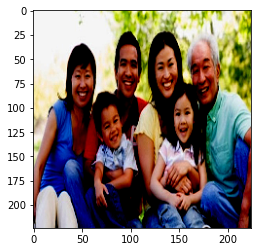

In [35]:
n = 4
sample_image = X_train[n]
final_image = sample_image
print(sample_image.shape)
plt.imshow(sample_image)

#### Sample Mask

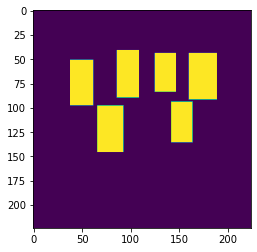

In [36]:
n = 4
sample_mask = masks[n]
final_mask = sample_mask
plt.imshow(sample_mask)

#### Predicted Mask

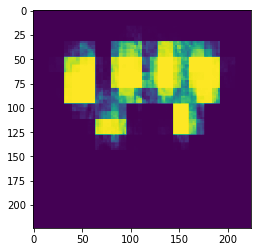

In [37]:
sample_image = np.resize(sample_image, (1, 224, 224, 3))
pred_mask = model.predict(x = sample_image)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask)

#### Impose the mask on the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


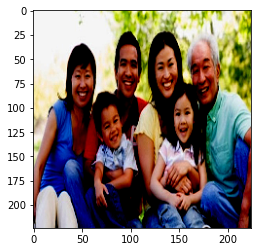

In [38]:
final_pred_mask = np.resize(pred_mask, (224, 224))
final_image = np.resize(sample_image, (224, 224, 3))
plt.imshow(final_image)

#### Mask imposed on image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


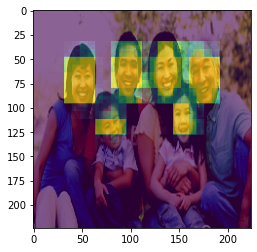

In [39]:
fig = plt.figure()
img_1 = plt.imshow(final_image)
img_2 = plt.imshow(final_pred_mask, alpha = 0.6)
plt.show()

### 4. Prediction Image Face Detection

In [138]:
# importing necessary packages
import cv2
import matplotlib.pyplot as plt

# Using cv2.imread() method
img = cv2.imread('imageP.jpg')
final_image = img

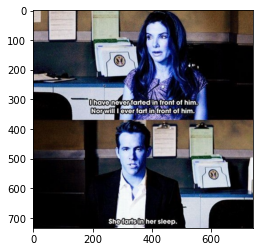

In [139]:
#print('Shape of image: ', img.shape)
plt.imshow(img)

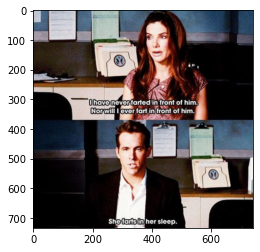

In [140]:
from PIL import Image
import matplotlib.pyplot as plt

# Opens a image in RGB mode
im = Image.open(r"imageP.jpg")

plt.imshow(im)

im1 = im.resize((224, 224))

#### Predicted Mask

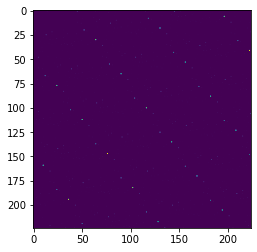

In [141]:
img = np.resize(im1, (1, 224, 224, 3))
pred_mask = model.predict(x = img)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask)

#### Impose the mask on the image

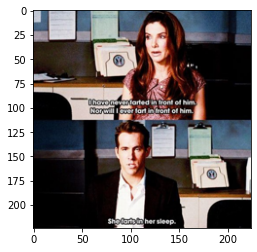

In [142]:
final_pred_mask = np.resize(pred_mask, (224, 224))
final_image = np.resize(img, (224, 224, 3))
plt.imshow(final_image)

#### Mask imposed on image

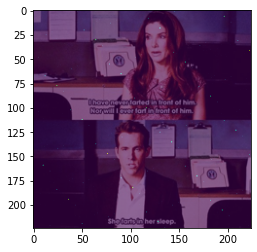

In [143]:
fig = plt.figure()
img_1 = plt.imshow(final_image)
img_2 = plt.imshow(final_pred_mask, alpha = 0.6)
plt.show()

#### Inferences of Image Prediction
The inference predictions made for sample Image 2 were not appropriately showing eventhough the algorithm is totally correct (as seen in Image 1 predictions), this is because of the following reasons:
- The training images might not have been of that large size such that the model can very accurately predict. We can fix this issue by adding more training images for more accurate and better results.
- The number of epochs used were 10, and to increase performance of the model, we can use a lot higher number of epochs. 




## Conclusion of Part 1

Project was all about how we can make use of a pretrained MobileNet (Transfer Learning) and on top of it add all the UNET layers to train, fit and evaluate model with an objective to predict the boundaries(mask) around the face in a given image.

- Model was complied using binary cross entropy as loss, adam optimizer and dice coefficient as metrics.
- Model checkpoint, early stopping and learning rate reducers were used as callbacks.
- Data was split into train and validation using 90/10 ratio. Best loss I got is 0.4323 and dice_coefficient of 0.7652 on the training data with just 10 epochs.
- Model weights for this were used and then used to predict on validation data to get mask.
- Further checked on sample image and imposed mask on the image.
- As seen in the above images, it can be seen that model does a very good job in predicting the masks.

# Part 2

#### DOMAIN: 
Face recognition

#### CONTEXT: 
Company X intends to build a face identification model to recognise human faces.

#### DATA DESCRIPTION: 
The dataset comprises of images and its mask where there is a human face.

#### PROJECT OBJECTIVE: 
Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
from 'Pinterest' and aligned using dlib library. 

#### TASK:
In this problem, we use a pre-trained model trained on Face recognition to recognise similar faces. Here, we are particularly
interested in recognising whether two given faces are of the same person or not. Below are the steps involved in the project.
- Load the dataset and create the metadata.
- Check some samples of metadata.
- Load the pre-trained model and weights.
- Generate Embedding vectors for each face in the dataset.
- Build distance metrics for identifying the distance between two given images.
- Use PCA for dimensionality reduction.
- Build an SVM classifier in order to map each image to its right person.
- Import the the test image. Display the image. Use the SVM trained model to predict the face.

In [2]:
#Import packages which are necessary
import tensorflow
import os
import cv2

import numpy as np
from  matplotlib import pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Model

import time

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#### Extra Metadata and Loading Images given

In [4]:
os.chdir('C:/Users/Dell/Desktop/PinterestPics')
path = '.'
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')

In [5]:
metadata[1]

PINS\pins_Aaron Paul\Aaron Paul101_247.jpg

#### Load Image From Metadata

In [6]:
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels in BGR order. So we need to reverse them
    return img[...,::-1]

#### Some samples from the Metadata

In [7]:
pathimg = str(metadata[4])
oneImg  = load_image(pathimg)
oneImg = oneImg[...,::-1]

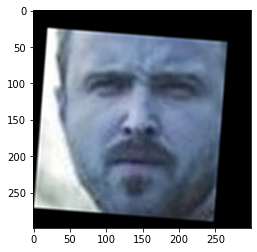

In [8]:
%matplotlib inline
plt.imshow(oneImg)
plt.show()

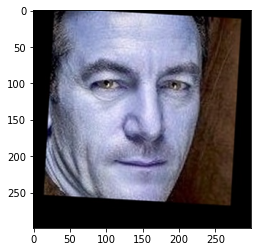

In [9]:
pathimg = str(metadata[5000])
oneImg  = load_image(pathimg)
oneImg = oneImg[...,::-1]
plt.imshow(oneImg)
plt.show()

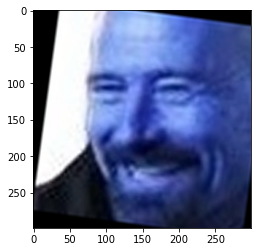

In [10]:
pathimg = str(metadata[2000])
oneImg  = load_image(pathimg)
oneImg = oneImg[...,::-1]
plt.imshow(oneImg)
plt.show()

### Using pre-defined VGG Model

In [11]:
def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Loading VGG Model with corresponding Weights

In [12]:
model = vgg_face()
WEIGHTS_FILE = "C:/Users/Dell/Desktop/Part 3 - vgg_face_weights.h5"
model.load_weights(WEIGHTS_FILE)

#### Fetch vgg_face_descriptor

In [13]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
vgg_face_descriptor

#### Generate Embedding vectors for each face in the dataset

In [14]:
embeddings = np.zeros((metadata.shape[0], 2622))
start_time = time.time()
for i, m in enumerate(metadata):
  print('Iteration == ', i)
  print('m value == ', m)
  img_path = m.image_path()
  img = load_image(img_path)
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224, 224))
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

computational_time = time.time() - start_time
print('Done in %0.3fs' %(computational_time))

embeddings[0]

Iteration ==  0
m value ==  PINS\pins_Aaron Paul\Aaron Paul0_262.jpg
Iteration ==  1
m value ==  PINS\pins_Aaron Paul\Aaron Paul101_247.jpg
Iteration ==  2
m value ==  PINS\pins_Aaron Paul\Aaron Paul101_248.jpg
Iteration ==  3
m value ==  PINS\pins_Aaron Paul\Aaron Paul101_249.jpg
Iteration ==  4
m value ==  PINS\pins_Aaron Paul\Aaron Paul103_217.jpg
Iteration ==  5
m value ==  PINS\pins_Aaron Paul\Aaron Paul113_228.jpg
Iteration ==  6
m value ==  PINS\pins_Aaron Paul\Aaron Paul114_271.jpg
Iteration ==  7
m value ==  PINS\pins_Aaron Paul\Aaron Paul116_240.jpg
Iteration ==  8
m value ==  PINS\pins_Aaron Paul\Aaron Paul117_213.jpg
Iteration ==  9
m value ==  PINS\pins_Aaron Paul\Aaron Paul119_219.jpg
Iteration ==  10
m value ==  PINS\pins_Aaron Paul\Aaron Paul120_290.jpg
Iteration ==  11
m value ==  PINS\pins_Aaron Paul\Aaron Paul124_221.jpg
Iteration ==  12
m value ==  PINS\pins_Aaron Paul\Aaron Paul126_291.jpg
Iteration ==  13
m value ==  PINS\pins_Aaron Paul\Aaron Paul129_259.jpg
Iter

Iteration ==  111
m value ==  PINS\pins_alexandra daddario\alexandra daddario120.jpg
Iteration ==  112
m value ==  PINS\pins_alexandra daddario\alexandra daddario121.jpg
Iteration ==  113
m value ==  PINS\pins_alexandra daddario\alexandra daddario122.jpg
Iteration ==  114
m value ==  PINS\pins_alexandra daddario\alexandra daddario123.jpg
Iteration ==  115
m value ==  PINS\pins_alexandra daddario\alexandra daddario124.jpg
Iteration ==  116
m value ==  PINS\pins_alexandra daddario\alexandra daddario125.jpg
Iteration ==  117
m value ==  PINS\pins_alexandra daddario\alexandra daddario126.jpg
Iteration ==  118
m value ==  PINS\pins_alexandra daddario\alexandra daddario127.jpg
Iteration ==  119
m value ==  PINS\pins_alexandra daddario\alexandra daddario128.jpg
Iteration ==  120
m value ==  PINS\pins_alexandra daddario\alexandra daddario129.jpg
Iteration ==  121
m value ==  PINS\pins_alexandra daddario\alexandra daddario13.jpg
Iteration ==  122
m value ==  PINS\pins_alexandra daddario\alexand

Iteration ==  209
m value ==  PINS\pins_alexandra daddario\alexandra daddario60.jpg
Iteration ==  210
m value ==  PINS\pins_alexandra daddario\alexandra daddario61.jpg
Iteration ==  211
m value ==  PINS\pins_alexandra daddario\alexandra daddario62.jpg
Iteration ==  212
m value ==  PINS\pins_alexandra daddario\alexandra daddario63.jpg
Iteration ==  213
m value ==  PINS\pins_alexandra daddario\alexandra daddario64.jpg
Iteration ==  214
m value ==  PINS\pins_alexandra daddario\alexandra daddario65.jpg
Iteration ==  215
m value ==  PINS\pins_alexandra daddario\alexandra daddario66.jpg
Iteration ==  216
m value ==  PINS\pins_alexandra daddario\alexandra daddario67.jpg
Iteration ==  217
m value ==  PINS\pins_alexandra daddario\alexandra daddario68.jpg
Iteration ==  218
m value ==  PINS\pins_alexandra daddario\alexandra daddario69.jpg
Iteration ==  219
m value ==  PINS\pins_alexandra daddario\alexandra daddario7.jpg
Iteration ==  220
m value ==  PINS\pins_alexandra daddario\alexandra daddario

Iteration ==  312
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte53_827.jpg
Iteration ==  313
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte54_869.jpg
Iteration ==  314
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte55_801.jpg
Iteration ==  315
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte56_794.jpg
Iteration ==  316
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte58_866.jpg
Iteration ==  317
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte59_823.jpg
Iteration ==  318
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte5_814.jpg
Iteration ==  319
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte62_841.jpg
Iteration ==  320
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte63_838.jpg
Iteration ==  321
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte65_807.jpg
Iteration ==  322
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte68_808.jpg
Iteration ==  323
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte6_824.jpg
Iteration ==  324
m value ==  PINS\pins_Alvaro Morte\Alvaro Morte72_811.jpg
Iteration ==  

Iteration ==  404
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face19.jpg
Iteration ==  405
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face2.jpg
Iteration ==  406
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face21.jpg
Iteration ==  407
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face24.jpg
Iteration ==  408
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face26.jpg
Iteration ==  409
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face27.jpg
Iteration ==  410
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face28.jpg
Iteration ==  411
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face29.jpg
Iteration ==  412
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face3.jpg
Iteration ==  413
m value ==  PINS\pins_alycia debnam carey face\alycia debnam carey face30.jpg
Iteration ==  414
m value ==  PINS\pins_al

Iteration ==  491
m value ==  PINS\pins_Amanda Crew\Amanda Crew102.jpg
Iteration ==  492
m value ==  PINS\pins_Amanda Crew\Amanda Crew103.jpg
Iteration ==  493
m value ==  PINS\pins_Amanda Crew\Amanda Crew104.jpg
Iteration ==  494
m value ==  PINS\pins_Amanda Crew\Amanda Crew105.jpg
Iteration ==  495
m value ==  PINS\pins_Amanda Crew\Amanda Crew106.jpg
Iteration ==  496
m value ==  PINS\pins_Amanda Crew\Amanda Crew107.jpg
Iteration ==  497
m value ==  PINS\pins_Amanda Crew\Amanda Crew108.jpg
Iteration ==  498
m value ==  PINS\pins_Amanda Crew\Amanda Crew109.jpg
Iteration ==  499
m value ==  PINS\pins_Amanda Crew\Amanda Crew11.jpg
Iteration ==  500
m value ==  PINS\pins_Amanda Crew\Amanda Crew110.jpg
Iteration ==  501
m value ==  PINS\pins_Amanda Crew\Amanda Crew113.jpg
Iteration ==  502
m value ==  PINS\pins_Amanda Crew\Amanda Crew114.jpg
Iteration ==  503
m value ==  PINS\pins_Amanda Crew\Amanda Crew115.jpg
Iteration ==  504
m value ==  PINS\pins_Amanda Crew\Amanda Crew116.jpg
Iterati

Iteration ==  608
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco101.jpg
Iteration ==  609
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco102.jpg
Iteration ==  610
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco103.jpg
Iteration ==  611
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco104.jpg
Iteration ==  612
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco105.jpg
Iteration ==  613
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco106.jpg
Iteration ==  614
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco107.jpg
Iteration ==  615
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco108.jpg
Iteration ==  616
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco109.jpg
Iteration ==  617
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco11.jpg
Iteration ==  618
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco110.jpg
Iteration ==  619
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco111.jpg
Iteration ==  620
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco112.jpg


Iteration ==  716
m value ==  PINS\pins_Amaury Nolasco\Amaury Nolasco99.jpg
Iteration ==  717
m value ==  PINS\pins_amber heard face\amber heard face0.jpg
Iteration ==  718
m value ==  PINS\pins_amber heard face\amber heard face1.jpg
Iteration ==  719
m value ==  PINS\pins_amber heard face\amber heard face10.jpg
Iteration ==  720
m value ==  PINS\pins_amber heard face\amber heard face100.jpg
Iteration ==  721
m value ==  PINS\pins_amber heard face\amber heard face101.jpg
Iteration ==  722
m value ==  PINS\pins_amber heard face\amber heard face102.jpg
Iteration ==  723
m value ==  PINS\pins_amber heard face\amber heard face103.jpg
Iteration ==  724
m value ==  PINS\pins_amber heard face\amber heard face104.jpg
Iteration ==  725
m value ==  PINS\pins_amber heard face\amber heard face105.jpg
Iteration ==  726
m value ==  PINS\pins_amber heard face\amber heard face106.jpg
Iteration ==  727
m value ==  PINS\pins_amber heard face\amber heard face107.jpg
Iteration ==  728
m value ==  PINS\pin

Iteration ==  818
m value ==  PINS\pins_amber heard face\amber heard face54.jpg
Iteration ==  819
m value ==  PINS\pins_amber heard face\amber heard face55.jpg
Iteration ==  820
m value ==  PINS\pins_amber heard face\amber heard face56.jpg
Iteration ==  821
m value ==  PINS\pins_amber heard face\amber heard face57.jpg
Iteration ==  822
m value ==  PINS\pins_amber heard face\amber heard face58.jpg
Iteration ==  823
m value ==  PINS\pins_amber heard face\amber heard face59.jpg
Iteration ==  824
m value ==  PINS\pins_amber heard face\amber heard face6.jpg
Iteration ==  825
m value ==  PINS\pins_amber heard face\amber heard face60.jpg
Iteration ==  826
m value ==  PINS\pins_amber heard face\amber heard face61.jpg
Iteration ==  827
m value ==  PINS\pins_amber heard face\amber heard face62.jpg
Iteration ==  828
m value ==  PINS\pins_amber heard face\amber heard face63.jpg
Iteration ==  829
m value ==  PINS\pins_amber heard face\amber heard face64.jpg
Iteration ==  830
m value ==  PINS\pins_a

Iteration ==  927
m value ==  PINS\pins_Anna Gunn\Anna Gunn8_2298.jpg
Iteration ==  928
m value ==  PINS\pins_Anna Gunn\Anna Gunn92_2277.jpg
Iteration ==  929
m value ==  PINS\pins_Anna Gunn\Anna Gunn93_2286.jpg
Iteration ==  930
m value ==  PINS\pins_Anna Gunn\Anna Gunn94_2270.jpg
Iteration ==  931
m value ==  PINS\pins_Anna Gunn\Anna Gunn95_2268.jpg
Iteration ==  932
m value ==  PINS\pins_Anna Gunn\Anna Gunn98_2328.jpg
Iteration ==  933
m value ==  PINS\pins_Anna Gunn\Anna Gunn99_2266.jpg
Iteration ==  934
m value ==  PINS\pins_anne hathaway\anne hathaway0.jpg
Iteration ==  935
m value ==  PINS\pins_anne hathaway\anne hathaway1.jpg
Iteration ==  936
m value ==  PINS\pins_anne hathaway\anne hathaway10.jpg
Iteration ==  937
m value ==  PINS\pins_anne hathaway\anne hathaway100.jpg
Iteration ==  938
m value ==  PINS\pins_anne hathaway\anne hathaway101.jpg
Iteration ==  939
m value ==  PINS\pins_anne hathaway\anne hathaway102.jpg
Iteration ==  940
m value ==  PINS\pins_anne hathaway\anne 

Iteration ==  1037
m value ==  PINS\pins_anne hathaway\anne hathaway55.jpg
Iteration ==  1038
m value ==  PINS\pins_anne hathaway\anne hathaway56.jpg
Iteration ==  1039
m value ==  PINS\pins_anne hathaway\anne hathaway57.jpg
Iteration ==  1040
m value ==  PINS\pins_anne hathaway\anne hathaway58.jpg
Iteration ==  1041
m value ==  PINS\pins_anne hathaway\anne hathaway59.jpg
Iteration ==  1042
m value ==  PINS\pins_anne hathaway\anne hathaway6.jpg
Iteration ==  1043
m value ==  PINS\pins_anne hathaway\anne hathaway60.jpg
Iteration ==  1044
m value ==  PINS\pins_anne hathaway\anne hathaway61.jpg
Iteration ==  1045
m value ==  PINS\pins_anne hathaway\anne hathaway62.jpg
Iteration ==  1046
m value ==  PINS\pins_anne hathaway\anne hathaway63.jpg
Iteration ==  1047
m value ==  PINS\pins_anne hathaway\anne hathaway64.jpg
Iteration ==  1048
m value ==  PINS\pins_anne hathaway\anne hathaway65.jpg
Iteration ==  1049
m value ==  PINS\pins_anne hathaway\anne hathaway66.jpg
Iteration ==  1050
m value

Iteration ==  1138
m value ==  PINS\pins_barbara palvin face\barbara palvin face19.jpg
Iteration ==  1139
m value ==  PINS\pins_barbara palvin face\barbara palvin face2.jpg
Iteration ==  1140
m value ==  PINS\pins_barbara palvin face\barbara palvin face20.jpg
Iteration ==  1141
m value ==  PINS\pins_barbara palvin face\barbara palvin face21.jpg
Iteration ==  1142
m value ==  PINS\pins_barbara palvin face\barbara palvin face22.jpg
Iteration ==  1143
m value ==  PINS\pins_barbara palvin face\barbara palvin face23.jpg
Iteration ==  1144
m value ==  PINS\pins_barbara palvin face\barbara palvin face24.jpg
Iteration ==  1145
m value ==  PINS\pins_barbara palvin face\barbara palvin face25.jpg
Iteration ==  1146
m value ==  PINS\pins_barbara palvin face\barbara palvin face26.jpg
Iteration ==  1147
m value ==  PINS\pins_barbara palvin face\barbara palvin face27.jpg
Iteration ==  1148
m value ==  PINS\pins_barbara palvin face\barbara palvin face28.jpg
Iteration ==  1149
m value ==  PINS\pins_bar

Iteration ==  1233
m value ==  PINS\pins_bellamy blake face\bellamy blake face14.jpg
Iteration ==  1234
m value ==  PINS\pins_bellamy blake face\bellamy blake face15.jpg
Iteration ==  1235
m value ==  PINS\pins_bellamy blake face\bellamy blake face16.jpg
Iteration ==  1236
m value ==  PINS\pins_bellamy blake face\bellamy blake face17.jpg
Iteration ==  1237
m value ==  PINS\pins_bellamy blake face\bellamy blake face18.jpg
Iteration ==  1238
m value ==  PINS\pins_bellamy blake face\bellamy blake face2.jpg
Iteration ==  1239
m value ==  PINS\pins_bellamy blake face\bellamy blake face20.jpg
Iteration ==  1240
m value ==  PINS\pins_bellamy blake face\bellamy blake face21.jpg
Iteration ==  1241
m value ==  PINS\pins_bellamy blake face\bellamy blake face22.jpg
Iteration ==  1242
m value ==  PINS\pins_bellamy blake face\bellamy blake face23.jpg
Iteration ==  1243
m value ==  PINS\pins_bellamy blake face\bellamy blake face24.jpg
Iteration ==  1244
m value ==  PINS\pins_bellamy blake face\bellam

Iteration ==  1329
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch20.jpg
Iteration ==  1330
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch21.jpg
Iteration ==  1331
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch22.jpg
Iteration ==  1332
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch23.jpg
Iteration ==  1333
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch24.jpg
Iteration ==  1334
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch25.jpg
Iteration ==  1335
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch26.jpg
Iteration ==  1336
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch27.jpg
Iteration ==  1337
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch28.jpg
Iteration ==  1338
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch29.jpg
Iteration ==  1339
m value ==  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch3.jpg
Iteration ==  1340
m v

Iteration ==  1425
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt190_417.jpg
Iteration ==  1426
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt194_424.jpg
Iteration ==  1427
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt197_406.jpg
Iteration ==  1428
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt19_419.jpg
Iteration ==  1429
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt1_407.jpg
Iteration ==  1430
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt20_437.jpg
Iteration ==  1431
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt21_422.jpg
Iteration ==  1432
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt22_386.jpg
Iteration ==  1433
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt23_440.jpg
Iteration ==  1434
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt27_421.jpg
Iteration ==  1435
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt29_438.jpg
Iteration ==  1436
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt2_439.jpg
Iteration ==  1437
m value ==  PINS\pins_Betsy Brandt\Betsy Brandt32_413.jp

Iteration ==  1540
m value ==  PINS\pins_bill gates\bill gates78.jpg
Iteration ==  1541
m value ==  PINS\pins_bill gates\bill gates79.jpg
Iteration ==  1542
m value ==  PINS\pins_bill gates\bill gates8.jpg
Iteration ==  1543
m value ==  PINS\pins_bill gates\bill gates80.jpg
Iteration ==  1544
m value ==  PINS\pins_bill gates\bill gates81.jpg
Iteration ==  1545
m value ==  PINS\pins_bill gates\bill gates82.jpg
Iteration ==  1546
m value ==  PINS\pins_bill gates\bill gates83.jpg
Iteration ==  1547
m value ==  PINS\pins_bill gates\bill gates84.jpg
Iteration ==  1548
m value ==  PINS\pins_bill gates\bill gates86.jpg
Iteration ==  1549
m value ==  PINS\pins_bill gates\bill gates87.jpg
Iteration ==  1550
m value ==  PINS\pins_bill gates\bill gates9.jpg
Iteration ==  1551
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites0.jpg
Iteration ==  1552
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites1.jpg
Iteration ==  1553
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites10.jpg
It

Iteration ==  1643
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites65.jpg
Iteration ==  1644
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites66.jpg
Iteration ==  1645
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites67.jpg
Iteration ==  1646
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites68.jpg
Iteration ==  1647
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites69.jpg
Iteration ==  1648
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites7.jpg
Iteration ==  1649
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites70.jpg
Iteration ==  1650
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites71.jpg
Iteration ==  1651
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites72.jpg
Iteration ==  1652
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites73.jpg
Iteration ==  1653
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites74.jpg
Iteration ==  1654
m value ==  PINS\pins_Brenton Thwaites\Brenton Thwaites75.jpg
Iteration ==  1655
m value ==

Iteration ==  1753
m value ==  PINS\pins_brie larson\brie larson48.jpg
Iteration ==  1754
m value ==  PINS\pins_brie larson\brie larson49.jpg
Iteration ==  1755
m value ==  PINS\pins_brie larson\brie larson5.jpg
Iteration ==  1756
m value ==  PINS\pins_brie larson\brie larson50.jpg
Iteration ==  1757
m value ==  PINS\pins_brie larson\brie larson51.jpg
Iteration ==  1758
m value ==  PINS\pins_brie larson\brie larson52.jpg
Iteration ==  1759
m value ==  PINS\pins_brie larson\brie larson53.jpg
Iteration ==  1760
m value ==  PINS\pins_brie larson\brie larson54.jpg
Iteration ==  1761
m value ==  PINS\pins_brie larson\brie larson55.jpg
Iteration ==  1762
m value ==  PINS\pins_brie larson\brie larson56.jpg
Iteration ==  1763
m value ==  PINS\pins_brie larson\brie larson57.jpg
Iteration ==  1764
m value ==  PINS\pins_brie larson\brie larson58.jpg
Iteration ==  1765
m value ==  PINS\pins_brie larson\brie larson59.jpg
Iteration ==  1766
m value ==  PINS\pins_brie larson\brie larson6.jpg
Iteratio

Iteration ==  1864
m value ==  PINS\pins_Brit Marling\Brit Marling188_509.jpg
Iteration ==  1865
m value ==  PINS\pins_Brit Marling\Brit Marling192_517.jpg
Iteration ==  1866
m value ==  PINS\pins_Brit Marling\Brit Marling195_540.jpg
Iteration ==  1867
m value ==  PINS\pins_Brit Marling\Brit Marling196_456.jpg
Iteration ==  1868
m value ==  PINS\pins_Brit Marling\Brit Marling199_511.jpg
Iteration ==  1869
m value ==  PINS\pins_Brit Marling\Brit Marling1_499.jpg
Iteration ==  1870
m value ==  PINS\pins_Brit Marling\Brit Marling20_484.jpg
Iteration ==  1871
m value ==  PINS\pins_Brit Marling\Brit Marling22_513.jpg
Iteration ==  1872
m value ==  PINS\pins_Brit Marling\Brit Marling24_508.jpg
Iteration ==  1873
m value ==  PINS\pins_Brit Marling\Brit Marling25_531.jpg
Iteration ==  1874
m value ==  PINS\pins_Brit Marling\Brit Marling26_485.jpg
Iteration ==  1875
m value ==  PINS\pins_Brit Marling\Brit Marling27_537.jpg
Iteration ==  1876
m value ==  PINS\pins_Brit Marling\Brit Marling29_470

Iteration ==  1968
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston23_1267.jpg
Iteration ==  1969
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston23_1268.jpg
Iteration ==  1970
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston26_1210.jpg
Iteration ==  1971
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston2_1213.jpg
Iteration ==  1972
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston30_1236.jpg
Iteration ==  1973
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston31_1239.jpg
Iteration ==  1974
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston32_1230.jpg
Iteration ==  1975
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston36_1223.jpg
Iteration ==  1976
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston3_1215.jpg
Iteration ==  1977
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston40_1200.jpg
Iteration ==  1978
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston41_1234.jpg
Iteration ==  1979
m value ==  PINS\pins_Bryan Cranston\Bryan Cranston44_1256.jpg
Iteration ==  1980

Iteration ==  2079
m value ==  PINS\pins_Caity Lotz\Caity Lotz5.jpg
Iteration ==  2080
m value ==  PINS\pins_Caity Lotz\Caity Lotz50.jpg
Iteration ==  2081
m value ==  PINS\pins_Caity Lotz\Caity Lotz51.jpg
Iteration ==  2082
m value ==  PINS\pins_Caity Lotz\Caity Lotz52.jpg
Iteration ==  2083
m value ==  PINS\pins_Caity Lotz\Caity Lotz53.jpg
Iteration ==  2084
m value ==  PINS\pins_Caity Lotz\Caity Lotz54.jpg
Iteration ==  2085
m value ==  PINS\pins_Caity Lotz\Caity Lotz55.jpg
Iteration ==  2086
m value ==  PINS\pins_Caity Lotz\Caity Lotz56.jpg
Iteration ==  2087
m value ==  PINS\pins_Caity Lotz\Caity Lotz57.jpg
Iteration ==  2088
m value ==  PINS\pins_Caity Lotz\Caity Lotz58.jpg
Iteration ==  2089
m value ==  PINS\pins_Caity Lotz\Caity Lotz59.jpg
Iteration ==  2090
m value ==  PINS\pins_Caity Lotz\Caity Lotz6.jpg
Iteration ==  2091
m value ==  PINS\pins_Caity Lotz\Caity Lotz60.jpg
Iteration ==  2092
m value ==  PINS\pins_Caity Lotz\Caity Lotz61.jpg
Iteration ==  2093
m value ==  PINS\

Iteration ==  2189
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan46.jpg
Iteration ==  2190
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan47.jpg
Iteration ==  2191
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan48.jpg
Iteration ==  2192
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan49.jpg
Iteration ==  2193
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan5.jpg
Iteration ==  2194
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan50.jpg
Iteration ==  2195
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan51.jpg
Iteration ==  2196
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan52.jpg
Iteration ==  2197
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan53.jpg
Iteration ==  2198
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan54.jpg
Iteration ==  2199
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan55.jpg
Iteration ==  2200
m value ==  PINS\pins_Cameron Monaghan\Cameron Monaghan56.jpg
Iteration ==  2201
m value ==

Iteration ==  2286
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face27.jpg
Iteration ==  2287
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face28.jpg
Iteration ==  2288
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face29.jpg
Iteration ==  2289
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face3.jpg
Iteration ==  2290
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face30.jpg
Iteration ==  2291
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face31.jpg
Iteration ==  2292
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face32.jpg
Iteration ==  2293
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face33.jpg
Iteration ==  2294
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face34.jpg
Iteration ==  2295
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face35.jpg
Iteration ==  2296
m value ==  PINS\pins_chadwick boseman face\chadwick boseman face36.jpg


Iteration ==  2379
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo21.jpg
Iteration ==  2380
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo22.jpg
Iteration ==  2381
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo23.jpg
Iteration ==  2382
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo24.jpg
Iteration ==  2383
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo25.jpg
Iteration ==  2384
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo26.jpg
Iteration ==  2385
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo27.jpg
Iteration ==  2386
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo28.jpg
Iteration ==  2387
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo29.jpg
Iteration ==  2388
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo3.jpg
Iteration ==  2389
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo30.jpg
Iteration ==  2390
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo31.jpg
Iteration ==  2391
m value ==  PINS\pins_Chance Perdomo\Chance Perdomo32.jpg


Iteration ==  2489
m value ==  PINS\pins_Chris Evans\Chris Evans43.jpg
Iteration ==  2490
m value ==  PINS\pins_Chris Evans\Chris Evans44.jpg
Iteration ==  2491
m value ==  PINS\pins_Chris Evans\Chris Evans45.jpg
Iteration ==  2492
m value ==  PINS\pins_Chris Evans\Chris Evans46.jpg
Iteration ==  2493
m value ==  PINS\pins_Chris Evans\Chris Evans47.jpg
Iteration ==  2494
m value ==  PINS\pins_Chris Evans\Chris Evans48.jpg
Iteration ==  2495
m value ==  PINS\pins_Chris Evans\Chris Evans49.jpg
Iteration ==  2496
m value ==  PINS\pins_Chris Evans\Chris Evans5.jpg
Iteration ==  2497
m value ==  PINS\pins_Chris Evans\Chris Evans50.jpg
Iteration ==  2498
m value ==  PINS\pins_Chris Evans\Chris Evans51.jpg
Iteration ==  2499
m value ==  PINS\pins_Chris Evans\Chris Evans52.jpg
Iteration ==  2500
m value ==  PINS\pins_Chris Evans\Chris Evans53.jpg
Iteration ==  2501
m value ==  PINS\pins_Chris Evans\Chris Evans54.jpg
Iteration ==  2502
m value ==  PINS\pins_Chris Evans\Chris Evans55.jpg
Iterati

Iteration ==  2604
m value ==  PINS\pins_Chris Pratt\Chris Pratt3.jpg
Iteration ==  2605
m value ==  PINS\pins_Chris Pratt\Chris Pratt30.jpg
Iteration ==  2606
m value ==  PINS\pins_Chris Pratt\Chris Pratt31.jpg
Iteration ==  2607
m value ==  PINS\pins_Chris Pratt\Chris Pratt32.jpg
Iteration ==  2608
m value ==  PINS\pins_Chris Pratt\Chris Pratt34.jpg
Iteration ==  2609
m value ==  PINS\pins_Chris Pratt\Chris Pratt35.jpg
Iteration ==  2610
m value ==  PINS\pins_Chris Pratt\Chris Pratt36.jpg
Iteration ==  2611
m value ==  PINS\pins_Chris Pratt\Chris Pratt37.jpg
Iteration ==  2612
m value ==  PINS\pins_Chris Pratt\Chris Pratt38.jpg
Iteration ==  2613
m value ==  PINS\pins_Chris Pratt\Chris Pratt39.jpg
Iteration ==  2614
m value ==  PINS\pins_Chris Pratt\Chris Pratt4.jpg
Iteration ==  2615
m value ==  PINS\pins_Chris Pratt\Chris Pratt40.jpg
Iteration ==  2616
m value ==  PINS\pins_Chris Pratt\Chris Pratt41.jpg
Iteration ==  2617
m value ==  PINS\pins_Chris Pratt\Chris Pratt42.jpg
Iteratio

Iteration ==  2717
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders14.jpg
Iteration ==  2718
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders15.jpg
Iteration ==  2719
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders16.jpg
Iteration ==  2720
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders17.jpg
Iteration ==  2721
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders18.jpg
Iteration ==  2722
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders19.jpg
Iteration ==  2723
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders2.jpg
Iteration ==  2724
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders20.jpg
Iteration ==  2725
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders21.jpg
Iteration ==  2726
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders22.jpg
Iteration ==  2727
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders23.jpg
Iteration ==  2728
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders24.jpg
Iteration ==  2729
m value ==  PINS\pins_Cobie Smulders\Cobie Smulders25.jpg


Iteration ==  2823
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker11.jpg
Iteration ==  2824
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker111.jpg
Iteration ==  2825
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker112.jpg
Iteration ==  2826
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker113.jpg
Iteration ==  2827
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker114.jpg
Iteration ==  2828
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker115.jpg
Iteration ==  2829
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker12.jpg
Iteration ==  2830
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker13.jpg
Iteration ==  2831
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker14.jpg
Iteration ==  2832
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker15.jpg
Iteration ==  2833
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker16.jpg
Iteration ==  2834
m value ==  PINS\pins_Danielle Panabaker\

Iteration ==  2920
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker95.jpg
Iteration ==  2921
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker96.jpg
Iteration ==  2922
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker97.jpg
Iteration ==  2923
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker98.jpg
Iteration ==  2924
m value ==  PINS\pins_Danielle Panabaker\Danielle Panabaker99.jpg
Iteration ==  2925
m value ==  PINS\pins_Dave Franco\Dave Franco100_1552.jpg
Iteration ==  2926
m value ==  PINS\pins_Dave Franco\Dave Franco101_1513.jpg
Iteration ==  2927
m value ==  PINS\pins_Dave Franco\Dave Franco102_1485.jpg
Iteration ==  2928
m value ==  PINS\pins_Dave Franco\Dave Franco103_1440.jpg
Iteration ==  2929
m value ==  PINS\pins_Dave Franco\Dave Franco104_1476.jpg
Iteration ==  2930
m value ==  PINS\pins_Dave Franco\Dave Franco105_1512.jpg
Iteration ==  2931
m value ==  PINS\pins_Dave Franco\Dave Franco106_1490.jpg
Iteration ==  2932
m value ==  PINS\

Iteration ==  3027
m value ==  PINS\pins_Dave Franco\Dave Franco61_1467.jpg
Iteration ==  3028
m value ==  PINS\pins_Dave Franco\Dave Franco62_1509.jpg
Iteration ==  3029
m value ==  PINS\pins_Dave Franco\Dave Franco65_1506.jpg
Iteration ==  3030
m value ==  PINS\pins_Dave Franco\Dave Franco66_1489.jpg
Iteration ==  3031
m value ==  PINS\pins_Dave Franco\Dave Franco70_1514.jpg
Iteration ==  3032
m value ==  PINS\pins_Dave Franco\Dave Franco70_1515.jpg
Iteration ==  3033
m value ==  PINS\pins_Dave Franco\Dave Franco73_1439.jpg
Iteration ==  3034
m value ==  PINS\pins_Dave Franco\Dave Franco74_1539.jpg
Iteration ==  3035
m value ==  PINS\pins_Dave Franco\Dave Franco75_1437.jpg
Iteration ==  3036
m value ==  PINS\pins_Dave Franco\Dave Franco76_1557.jpg
Iteration ==  3037
m value ==  PINS\pins_Dave Franco\Dave Franco79_1502.jpg
Iteration ==  3038
m value ==  PINS\pins_Dave Franco\Dave Franco7_1522.jpg
Iteration ==  3039
m value ==  PINS\pins_Dave Franco\Dave Franco82_1499.jpg
Iteration == 

Iteration ==  3139
m value ==  PINS\pins_david mazouz\david mazouz85.jpg
Iteration ==  3140
m value ==  PINS\pins_david mazouz\david mazouz86.jpg
Iteration ==  3141
m value ==  PINS\pins_david mazouz\david mazouz87.jpg
Iteration ==  3142
m value ==  PINS\pins_david mazouz\david mazouz88.jpg
Iteration ==  3143
m value ==  PINS\pins_david mazouz\david mazouz89.jpg
Iteration ==  3144
m value ==  PINS\pins_david mazouz\david mazouz9.jpg
Iteration ==  3145
m value ==  PINS\pins_david mazouz\david mazouz90.jpg
Iteration ==  3146
m value ==  PINS\pins_david mazouz\david mazouz91.jpg
Iteration ==  3147
m value ==  PINS\pins_david mazouz\david mazouz92.jpg
Iteration ==  3148
m value ==  PINS\pins_david mazouz\david mazouz93.jpg
Iteration ==  3149
m value ==  PINS\pins_david mazouz\david mazouz94.jpg
Iteration ==  3150
m value ==  PINS\pins_david mazouz\david mazouz95.jpg
Iteration ==  3151
m value ==  PINS\pins_david mazouz\david mazouz96.jpg
Iteration ==  3152
m value ==  PINS\pins_david mazou

Iteration ==  3244
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell81.jpg
Iteration ==  3245
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell82.jpg
Iteration ==  3246
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell83.jpg
Iteration ==  3247
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell84.jpg
Iteration ==  3248
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell85.jpg
Iteration ==  3249
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell86.jpg
Iteration ==  3250
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell87.jpg
Iteration ==  3251
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell88.jpg
Iteration ==  3252
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell89.jpg
Iteration ==  3253
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell9.jpg
Iteration ==  3254
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell90.jpg
Iteration ==  3255
m value ==  PINS\pins_Dominic Purcell\Dominic Purcell91.jpg
Iteration ==  3256
m value ==  PINS\pins_Dominic Purc

Iteration ==  3358
m value ==  PINS\pins_dua lipa face\dua lipa face28.jpg
Iteration ==  3359
m value ==  PINS\pins_dua lipa face\dua lipa face29.jpg
Iteration ==  3360
m value ==  PINS\pins_dua lipa face\dua lipa face3.jpg
Iteration ==  3361
m value ==  PINS\pins_dua lipa face\dua lipa face30.jpg
Iteration ==  3362
m value ==  PINS\pins_dua lipa face\dua lipa face31.jpg
Iteration ==  3363
m value ==  PINS\pins_dua lipa face\dua lipa face32.jpg
Iteration ==  3364
m value ==  PINS\pins_dua lipa face\dua lipa face33.jpg
Iteration ==  3365
m value ==  PINS\pins_dua lipa face\dua lipa face34.jpg
Iteration ==  3366
m value ==  PINS\pins_dua lipa face\dua lipa face35.jpg
Iteration ==  3367
m value ==  PINS\pins_dua lipa face\dua lipa face36.jpg
Iteration ==  3368
m value ==  PINS\pins_dua lipa face\dua lipa face37.jpg
Iteration ==  3369
m value ==  PINS\pins_dua lipa face\dua lipa face38.jpg
Iteration ==  3370
m value ==  PINS\pins_dua lipa face\dua lipa face39.jpg
Iteration ==  3371
m value

Iteration ==  3467
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson13.jpg
Iteration ==  3468
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson14.jpg
Iteration ==  3469
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson15.jpg
Iteration ==  3470
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson16.jpg
Iteration ==  3471
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson17.jpg
Iteration ==  3472
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson18.jpg
Iteration ==  3473
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson19.jpg
Iteration ==  3474
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson2.jpg
Iteration ==  3475
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson20.jpg
Iteration ==  3476
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson21.jpg
Iteration ==  3477
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson22.jpg
Iteration ==  3478
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson23.jpg
Iteration ==  3479
m value ==  PINS\pins_Dwayne Johnson\Dwayne Johnson24.jpg


Iteration ==  3575
m value ==  PINS\pins_eliza taylor\eliza taylor14.jpg
Iteration ==  3576
m value ==  PINS\pins_eliza taylor\eliza taylor15.jpg
Iteration ==  3577
m value ==  PINS\pins_eliza taylor\eliza taylor16.jpg
Iteration ==  3578
m value ==  PINS\pins_eliza taylor\eliza taylor17.jpg
Iteration ==  3579
m value ==  PINS\pins_eliza taylor\eliza taylor18.jpg
Iteration ==  3580
m value ==  PINS\pins_eliza taylor\eliza taylor19.jpg
Iteration ==  3581
m value ==  PINS\pins_eliza taylor\eliza taylor2.jpg
Iteration ==  3582
m value ==  PINS\pins_eliza taylor\eliza taylor20.jpg
Iteration ==  3583
m value ==  PINS\pins_eliza taylor\eliza taylor21.jpg
Iteration ==  3584
m value ==  PINS\pins_eliza taylor\eliza taylor22.jpg
Iteration ==  3585
m value ==  PINS\pins_eliza taylor\eliza taylor23.jpg
Iteration ==  3586
m value ==  PINS\pins_eliza taylor\eliza taylor24.jpg
Iteration ==  3587
m value ==  PINS\pins_eliza taylor\eliza taylor25.jpg
Iteration ==  3588
m value ==  PINS\pins_eliza taylo

Iteration ==  3684
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face115.jpg
Iteration ==  3685
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face116.jpg
Iteration ==  3686
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face117.jpg
Iteration ==  3687
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face118.jpg
Iteration ==  3688
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face119.jpg
Iteration ==  3689
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face12.jpg
Iteration ==  3690
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face120.jpg
Iteration ==  3691
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face121.jpg
Iteration ==  3692
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face122.jpg
Iteration ==  3693
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face123.jpg
Iteration ==  3694
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face124.jpg
Iteration =

Iteration ==  3776
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face34.jpg
Iteration ==  3777
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face35.jpg
Iteration ==  3778
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face36.jpg
Iteration ==  3779
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face37.jpg
Iteration ==  3780
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face38.jpg
Iteration ==  3781
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face39.jpg
Iteration ==  3782
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face4.jpg
Iteration ==  3783
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face40.jpg
Iteration ==  3784
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face41.jpg
Iteration ==  3785
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face42.jpg
Iteration ==  3786
m value ==  PINS\pins_elizabeth olsen face\elizabeth olsen face43.jpg
Iteration ==  3787
m v

Iteration ==  3876
m value ==  PINS\pins_elon musk\elon musk35.jpg
Iteration ==  3877
m value ==  PINS\pins_elon musk\elon musk36.jpg
Iteration ==  3878
m value ==  PINS\pins_elon musk\elon musk37.jpg
Iteration ==  3879
m value ==  PINS\pins_elon musk\elon musk38.jpg
Iteration ==  3880
m value ==  PINS\pins_elon musk\elon musk39.jpg
Iteration ==  3881
m value ==  PINS\pins_elon musk\elon musk4.jpg
Iteration ==  3882
m value ==  PINS\pins_elon musk\elon musk40.jpg
Iteration ==  3883
m value ==  PINS\pins_elon musk\elon musk41.jpg
Iteration ==  3884
m value ==  PINS\pins_elon musk\elon musk42.jpg
Iteration ==  3885
m value ==  PINS\pins_elon musk\elon musk43.jpg
Iteration ==  3886
m value ==  PINS\pins_elon musk\elon musk44.jpg
Iteration ==  3887
m value ==  PINS\pins_elon musk\elon musk45.jpg
Iteration ==  3888
m value ==  PINS\pins_elon musk\elon musk46.jpg
Iteration ==  3889
m value ==  PINS\pins_elon musk\elon musk47.jpg
Iteration ==  3890
m value ==  PINS\pins_elon musk\elon musk48.

Iteration ==  3988
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke161_1012.jpg
Iteration ==  3989
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke166_893.jpg
Iteration ==  3990
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke167_957.jpg
Iteration ==  3991
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke168_974.jpg
Iteration ==  3992
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke16_1025.jpg
Iteration ==  3993
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke171_901.jpg
Iteration ==  3994
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke173_950.jpg
Iteration ==  3995
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke175_1010.jpg
Iteration ==  3996
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke176_889.jpg
Iteration ==  3997
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke177_1003.jpg
Iteration ==  3998
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke178_988.jpg
Iteration ==  3999
m value ==  PINS\pins_Emilia Clarke\Emilia Clarke17_902.jpg
Iteration ==  4000
m value ==  PINS\pi

Iteration ==  4091
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards14.jpg
Iteration ==  4092
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards15.jpg
Iteration ==  4093
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards16.jpg
Iteration ==  4094
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards17.jpg
Iteration ==  4095
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards18.jpg
Iteration ==  4096
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards19.jpg
Iteration ==  4097
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards2.jpg
Iteration ==  4098
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards20.jpg
Iteration ==  4099
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards21.jpg
Iteration ==  4100
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards22.jpg
Iteration ==  4101
m value ==  PINS\pins_Emily Bett Rickards\Emily Bett Rickards23.jpg
Iteration ==  4102
m value ==  PINS\pins_Emi

Iteration ==  4192
m value ==  PINS\pins_Emma Stone\Emma Stone126.jpg
Iteration ==  4193
m value ==  PINS\pins_Emma Stone\Emma Stone127.jpg
Iteration ==  4194
m value ==  PINS\pins_Emma Stone\Emma Stone128.jpg
Iteration ==  4195
m value ==  PINS\pins_Emma Stone\Emma Stone129.jpg
Iteration ==  4196
m value ==  PINS\pins_Emma Stone\Emma Stone13.jpg
Iteration ==  4197
m value ==  PINS\pins_Emma Stone\Emma Stone130.jpg
Iteration ==  4198
m value ==  PINS\pins_Emma Stone\Emma Stone14.jpg
Iteration ==  4199
m value ==  PINS\pins_Emma Stone\Emma Stone15.jpg
Iteration ==  4200
m value ==  PINS\pins_Emma Stone\Emma Stone16.jpg
Iteration ==  4201
m value ==  PINS\pins_Emma Stone\Emma Stone17.jpg
Iteration ==  4202
m value ==  PINS\pins_Emma Stone\Emma Stone18.jpg
Iteration ==  4203
m value ==  PINS\pins_Emma Stone\Emma Stone19.jpg
Iteration ==  4204
m value ==  PINS\pins_Emma Stone\Emma Stone2.jpg
Iteration ==  4205
m value ==  PINS\pins_Emma Stone\Emma Stone20.jpg
Iteration ==  4206
m value == 

Iteration ==  4308
m value ==  PINS\pins_emma watson face\emma watson face114.jpg
Iteration ==  4309
m value ==  PINS\pins_emma watson face\emma watson face115.jpg
Iteration ==  4310
m value ==  PINS\pins_emma watson face\emma watson face116.jpg
Iteration ==  4311
m value ==  PINS\pins_emma watson face\emma watson face117.jpg
Iteration ==  4312
m value ==  PINS\pins_emma watson face\emma watson face118.jpg
Iteration ==  4313
m value ==  PINS\pins_emma watson face\emma watson face119.jpg
Iteration ==  4314
m value ==  PINS\pins_emma watson face\emma watson face12.jpg
Iteration ==  4315
m value ==  PINS\pins_emma watson face\emma watson face120.jpg
Iteration ==  4316
m value ==  PINS\pins_emma watson face\emma watson face121.jpg
Iteration ==  4317
m value ==  PINS\pins_emma watson face\emma watson face122.jpg
Iteration ==  4318
m value ==  PINS\pins_emma watson face\emma watson face123.jpg
Iteration ==  4319
m value ==  PINS\pins_emma watson face\emma watson face124.jpg
Iteration ==  432

Iteration ==  4409
m value ==  PINS\pins_emma watson face\emma watson face6.jpg
Iteration ==  4410
m value ==  PINS\pins_emma watson face\emma watson face60.jpg
Iteration ==  4411
m value ==  PINS\pins_emma watson face\emma watson face61.jpg
Iteration ==  4412
m value ==  PINS\pins_emma watson face\emma watson face62.jpg
Iteration ==  4413
m value ==  PINS\pins_emma watson face\emma watson face63.jpg
Iteration ==  4414
m value ==  PINS\pins_emma watson face\emma watson face64.jpg
Iteration ==  4415
m value ==  PINS\pins_emma watson face\emma watson face65.jpg
Iteration ==  4416
m value ==  PINS\pins_emma watson face\emma watson face66.jpg
Iteration ==  4417
m value ==  PINS\pins_emma watson face\emma watson face67.jpg
Iteration ==  4418
m value ==  PINS\pins_emma watson face\emma watson face68.jpg
Iteration ==  4419
m value ==  PINS\pins_emma watson face\emma watson face69.jpg
Iteration ==  4420
m value ==  PINS\pins_emma watson face\emma watson face7.jpg
Iteration ==  4421
m value == 

Iteration ==  4513
m value ==  PINS\pins_gal gadot face\gal gadot face152.jpg
Iteration ==  4514
m value ==  PINS\pins_gal gadot face\gal gadot face153.jpg
Iteration ==  4515
m value ==  PINS\pins_gal gadot face\gal gadot face154.jpg
Iteration ==  4516
m value ==  PINS\pins_gal gadot face\gal gadot face155.jpg
Iteration ==  4517
m value ==  PINS\pins_gal gadot face\gal gadot face156.jpg
Iteration ==  4518
m value ==  PINS\pins_gal gadot face\gal gadot face157.jpg
Iteration ==  4519
m value ==  PINS\pins_gal gadot face\gal gadot face158.jpg
Iteration ==  4520
m value ==  PINS\pins_gal gadot face\gal gadot face16.jpg
Iteration ==  4521
m value ==  PINS\pins_gal gadot face\gal gadot face17.jpg
Iteration ==  4522
m value ==  PINS\pins_gal gadot face\gal gadot face18.jpg
Iteration ==  4523
m value ==  PINS\pins_gal gadot face\gal gadot face19.jpg
Iteration ==  4524
m value ==  PINS\pins_gal gadot face\gal gadot face2.jpg
Iteration ==  4525
m value ==  PINS\pins_gal gadot face\gal gadot face

Iteration ==  4619
m value ==  PINS\pins_grant gustin face\grant gustin face106.jpg
Iteration ==  4620
m value ==  PINS\pins_grant gustin face\grant gustin face107.jpg
Iteration ==  4621
m value ==  PINS\pins_grant gustin face\grant gustin face108.jpg
Iteration ==  4622
m value ==  PINS\pins_grant gustin face\grant gustin face109.jpg
Iteration ==  4623
m value ==  PINS\pins_grant gustin face\grant gustin face11.jpg
Iteration ==  4624
m value ==  PINS\pins_grant gustin face\grant gustin face110.jpg
Iteration ==  4625
m value ==  PINS\pins_grant gustin face\grant gustin face111.jpg
Iteration ==  4626
m value ==  PINS\pins_grant gustin face\grant gustin face112.jpg
Iteration ==  4627
m value ==  PINS\pins_grant gustin face\grant gustin face113.jpg
Iteration ==  4628
m value ==  PINS\pins_grant gustin face\grant gustin face114.jpg
Iteration ==  4629
m value ==  PINS\pins_grant gustin face\grant gustin face115.jpg
Iteration ==  4630
m value ==  PINS\pins_grant gustin face\grant gustin face1

Iteration ==  4718
m value ==  PINS\pins_grant gustin face\grant gustin face86.jpg
Iteration ==  4719
m value ==  PINS\pins_grant gustin face\grant gustin face87.jpg
Iteration ==  4720
m value ==  PINS\pins_grant gustin face\grant gustin face88.jpg
Iteration ==  4721
m value ==  PINS\pins_grant gustin face\grant gustin face89.jpg
Iteration ==  4722
m value ==  PINS\pins_grant gustin face\grant gustin face9.jpg
Iteration ==  4723
m value ==  PINS\pins_grant gustin face\grant gustin face90.jpg
Iteration ==  4724
m value ==  PINS\pins_grant gustin face\grant gustin face91.jpg
Iteration ==  4725
m value ==  PINS\pins_grant gustin face\grant gustin face92.jpg
Iteration ==  4726
m value ==  PINS\pins_grant gustin face\grant gustin face93.jpg
Iteration ==  4727
m value ==  PINS\pins_grant gustin face\grant gustin face94.jpg
Iteration ==  4728
m value ==  PINS\pins_grant gustin face\grant gustin face95.jpg
Iteration ==  4729
m value ==  PINS\pins_grant gustin face\grant gustin face96.jpg
Itera

Iteration ==  4821
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow7.jpg
Iteration ==  4822
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow70.jpg
Iteration ==  4823
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow71.jpg
Iteration ==  4824
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow72.jpg
Iteration ==  4825
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow73.jpg
Iteration ==  4826
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow74.jpg
Iteration ==  4827
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow75.jpg
Iteration ==  4828
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow76.jpg
Iteration ==  4829
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow77.jpg
Iteration ==  4830
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow78.jpg
Iteration ==  4831
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow79.jpg
Iteration ==  4832
m value ==  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow8.jpg
Iteration ==  4833
m value ==  PINS\pins_Gwyneth Paltr

Iteration ==  4933
m value ==  PINS\pins_Henry Cavil\Henry Cavil5.jpg
Iteration ==  4934
m value ==  PINS\pins_Henry Cavil\Henry Cavil50.jpg
Iteration ==  4935
m value ==  PINS\pins_Henry Cavil\Henry Cavil51.jpg
Iteration ==  4936
m value ==  PINS\pins_Henry Cavil\Henry Cavil52.jpg
Iteration ==  4937
m value ==  PINS\pins_Henry Cavil\Henry Cavil53.jpg
Iteration ==  4938
m value ==  PINS\pins_Henry Cavil\Henry Cavil54.jpg
Iteration ==  4939
m value ==  PINS\pins_Henry Cavil\Henry Cavil55.jpg
Iteration ==  4940
m value ==  PINS\pins_Henry Cavil\Henry Cavil56.jpg
Iteration ==  4941
m value ==  PINS\pins_Henry Cavil\Henry Cavil57.jpg
Iteration ==  4942
m value ==  PINS\pins_Henry Cavil\Henry Cavil58.jpg
Iteration ==  4943
m value ==  PINS\pins_Henry Cavil\Henry Cavil59.jpg
Iteration ==  4944
m value ==  PINS\pins_Henry Cavil\Henry Cavil6.jpg
Iteration ==  4945
m value ==  PINS\pins_Henry Cavil\Henry Cavil60.jpg
Iteration ==  4946
m value ==  PINS\pins_Henry Cavil\Henry Cavil61.jpg
Iteratio

Iteration ==  5043
m value ==  PINS\pins_jason isaacs\jason isaacs182_2122.jpg
Iteration ==  5044
m value ==  PINS\pins_jason isaacs\jason isaacs183_2069.jpg
Iteration ==  5045
m value ==  PINS\pins_jason isaacs\jason isaacs184_2120.jpg
Iteration ==  5046
m value ==  PINS\pins_jason isaacs\jason isaacs185_2105.jpg
Iteration ==  5047
m value ==  PINS\pins_jason isaacs\jason isaacs187_2071.jpg
Iteration ==  5048
m value ==  PINS\pins_jason isaacs\jason isaacs188_2103.jpg
Iteration ==  5049
m value ==  PINS\pins_jason isaacs\jason isaacs191_2098.jpg
Iteration ==  5050
m value ==  PINS\pins_jason isaacs\jason isaacs192_2015.jpg
Iteration ==  5051
m value ==  PINS\pins_jason isaacs\jason isaacs193_2111.jpg
Iteration ==  5052
m value ==  PINS\pins_jason isaacs\jason isaacs194_2062.jpg
Iteration ==  5053
m value ==  PINS\pins_jason isaacs\jason isaacs195_2091.jpg
Iteration ==  5054
m value ==  PINS\pins_jason isaacs\jason isaacs196_2040.jpg
Iteration ==  5055
m value ==  PINS\pins_jason isaac

Iteration ==  5151
m value ==  PINS\pins_Jason Momoa\Jason Momoa132.jpg
Iteration ==  5152
m value ==  PINS\pins_Jason Momoa\Jason Momoa133.jpg
Iteration ==  5153
m value ==  PINS\pins_Jason Momoa\Jason Momoa134.jpg
Iteration ==  5154
m value ==  PINS\pins_Jason Momoa\Jason Momoa14.jpg
Iteration ==  5155
m value ==  PINS\pins_Jason Momoa\Jason Momoa15.jpg
Iteration ==  5156
m value ==  PINS\pins_Jason Momoa\Jason Momoa16.jpg
Iteration ==  5157
m value ==  PINS\pins_Jason Momoa\Jason Momoa17.jpg
Iteration ==  5158
m value ==  PINS\pins_Jason Momoa\Jason Momoa18.jpg
Iteration ==  5159
m value ==  PINS\pins_Jason Momoa\Jason Momoa19.jpg
Iteration ==  5160
m value ==  PINS\pins_Jason Momoa\Jason Momoa2.jpg
Iteration ==  5161
m value ==  PINS\pins_Jason Momoa\Jason Momoa20.jpg
Iteration ==  5162
m value ==  PINS\pins_Jason Momoa\Jason Momoa22.jpg
Iteration ==  5163
m value ==  PINS\pins_Jason Momoa\Jason Momoa23.jpg
Iteration ==  5164
m value ==  PINS\pins_Jason Momoa\Jason Momoa24.jpg
Iter

Iteration ==  5268
m value ==  PINS\pins_jeff bezos\jeff bezos29.jpg
Iteration ==  5269
m value ==  PINS\pins_jeff bezos\jeff bezos3.jpg
Iteration ==  5270
m value ==  PINS\pins_jeff bezos\jeff bezos30.jpg
Iteration ==  5271
m value ==  PINS\pins_jeff bezos\jeff bezos31.jpg
Iteration ==  5272
m value ==  PINS\pins_jeff bezos\jeff bezos32.jpg
Iteration ==  5273
m value ==  PINS\pins_jeff bezos\jeff bezos33.jpg
Iteration ==  5274
m value ==  PINS\pins_jeff bezos\jeff bezos34.jpg
Iteration ==  5275
m value ==  PINS\pins_jeff bezos\jeff bezos35.jpg
Iteration ==  5276
m value ==  PINS\pins_jeff bezos\jeff bezos36.jpg
Iteration ==  5277
m value ==  PINS\pins_jeff bezos\jeff bezos37.jpg
Iteration ==  5278
m value ==  PINS\pins_jeff bezos\jeff bezos39.jpg
Iteration ==  5279
m value ==  PINS\pins_jeff bezos\jeff bezos4.jpg
Iteration ==  5280
m value ==  PINS\pins_jeff bezos\jeff bezos40.jpg
Iteration ==  5281
m value ==  PINS\pins_jeff bezos\jeff bezos41.jpg
Iteration ==  5282
m value ==  PINS\

Iteration ==  5383
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner35.jpg
Iteration ==  5384
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner36.jpg
Iteration ==  5385
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner37.jpg
Iteration ==  5386
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner38.jpg
Iteration ==  5387
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner39.jpg
Iteration ==  5388
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner4.jpg
Iteration ==  5389
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner40.jpg
Iteration ==  5390
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner41.jpg
Iteration ==  5391
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner42.jpg
Iteration ==  5392
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner43.jpg
Iteration ==  5393
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner44.jpg
Iteration ==  5394
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner45.jpg
Iteration ==  5395
m value ==  PINS\pins_Jeremy Renner\Jeremy Renner46.jpg
Iteration ==  5396
m value

Iteration ==  5488
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg192_1395.jpg
Iteration ==  5489
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg193_1344.jpg
Iteration ==  5490
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg194_1379.jpg
Iteration ==  5491
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg199_1366.jpg
Iteration ==  5492
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg1_1417.jpg
Iteration ==  5493
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg20_1400.jpg
Iteration ==  5494
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg22_1405.jpg
Iteration ==  5495
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg24_1348.jpg
Iteration ==  5496
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg25_1393.jpg
Iteration ==  5497
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg26_1368.jpg
Iteration ==  5498
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg26_1369.jpg
Iteration ==  5499
m value ==  PINS\pins_Jesse Eisenberg\Jesse Eisenberg2

Iteration ==  5593
m value ==  PINS\pins_Jim Parsons\Jim Parsons43.jpg
Iteration ==  5594
m value ==  PINS\pins_Jim Parsons\Jim Parsons44.jpg
Iteration ==  5595
m value ==  PINS\pins_Jim Parsons\Jim Parsons45.jpg
Iteration ==  5596
m value ==  PINS\pins_Jim Parsons\Jim Parsons46.jpg
Iteration ==  5597
m value ==  PINS\pins_Jim Parsons\Jim Parsons47.jpg
Iteration ==  5598
m value ==  PINS\pins_Jim Parsons\Jim Parsons48.jpg
Iteration ==  5599
m value ==  PINS\pins_Jim Parsons\Jim Parsons49.jpg
Iteration ==  5600
m value ==  PINS\pins_Jim Parsons\Jim Parsons5.jpg
Iteration ==  5601
m value ==  PINS\pins_Jim Parsons\Jim Parsons50.jpg
Iteration ==  5602
m value ==  PINS\pins_Jim Parsons\Jim Parsons51.jpg
Iteration ==  5603
m value ==  PINS\pins_Jim Parsons\Jim Parsons52.jpg
Iteration ==  5604
m value ==  PINS\pins_Jim Parsons\Jim Parsons53.jpg
Iteration ==  5605
m value ==  PINS\pins_Jim Parsons\Jim Parsons54.jpg
Iteration ==  5606
m value ==  PINS\pins_Jim Parsons\Jim Parsons55.jpg
Iterati

Iteration ==  5704
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal65_2134.jpg
Iteration ==  5705
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal67_2189.jpg
Iteration ==  5706
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal71_2141.jpg
Iteration ==  5707
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal76_2153.jpg
Iteration ==  5708
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal78_2186.jpg
Iteration ==  5709
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal7_2139.jpg
Iteration ==  5710
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal80_2157.jpg
Iteration ==  5711
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal86_2161.jpg
Iteration ==  5712
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal88_2184.jpg
Iteration ==  5713
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal90_2168.jpg
Iteration ==  5714
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal94_2181.jpg
Iteration ==  5715
m value ==  PINS\pins_Jon Bernthal\Jon Bernthal99_2148.jpg
Iteration ==  5716
m value ==  PINS\pins_Josh Radnor\Josh Radnor0

Iteration ==  5819
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 10.jpg
Iteration ==  5820
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 100.jpg
Iteration ==  5821
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 101.jpg
Iteration ==  5822
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 102.jpg
Iteration ==  5823
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 103.jpg
Iteration ==  5824
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 104.jpg
Iteration ==  5825
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 105.jpg
Iteration ==  5826
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 106.jpg
Iteration ==  5827
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 107.jpg
Iteration ==  5828
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 108.jpg
Iteration ==  5829
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 109.jpg
Iteration ==  5830
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 11.jpg
Iteration ==  5831
m value ==  PINS\pins_k

Iteration ==  5922
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 43.jpg
Iteration ==  5923
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 44.jpg
Iteration ==  5924
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 45.jpg
Iteration ==  5925
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 46.jpg
Iteration ==  5926
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 47.jpg
Iteration ==  5927
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 48.jpg
Iteration ==  5928
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 49.jpg
Iteration ==  5929
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 5.jpg
Iteration ==  5930
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 50.jpg
Iteration ==  5931
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 51.jpg
Iteration ==  5932
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 52.jpg
Iteration ==  5933
m value ==  PINS\pins_kiernan shipka_\kiernan shipka 53.jpg
Iteration ==  5934
m value ==  PINS\pins_kiernan ship

Iteration ==  6025
m value ==  PINS\pins_Kit Harington\Kit Harington180_1752.jpg
Iteration ==  6026
m value ==  PINS\pins_Kit Harington\Kit Harington181_1817.jpg
Iteration ==  6027
m value ==  PINS\pins_Kit Harington\Kit Harington184_1775.jpg
Iteration ==  6028
m value ==  PINS\pins_Kit Harington\Kit Harington185_1855.jpg
Iteration ==  6029
m value ==  PINS\pins_Kit Harington\Kit Harington189_1814.jpg
Iteration ==  6030
m value ==  PINS\pins_Kit Harington\Kit Harington191_1827.jpg
Iteration ==  6031
m value ==  PINS\pins_Kit Harington\Kit Harington197_1761.jpg
Iteration ==  6032
m value ==  PINS\pins_Kit Harington\Kit Harington198_1760.jpg
Iteration ==  6033
m value ==  PINS\pins_Kit Harington\Kit Harington19_1824.jpg
Iteration ==  6034
m value ==  PINS\pins_Kit Harington\Kit Harington1_1783.jpg
Iteration ==  6035
m value ==  PINS\pins_Kit Harington\Kit Harington21_1835.jpg
Iteration ==  6036
m value ==  PINS\pins_Kit Harington\Kit Harington23_1776.jpg
Iteration ==  6037
m value ==  PI

Iteration ==  6124
m value ==  PINS\pins_kristen stewart face\kristen stewart face24.jpg
Iteration ==  6125
m value ==  PINS\pins_kristen stewart face\kristen stewart face25.jpg
Iteration ==  6126
m value ==  PINS\pins_kristen stewart face\kristen stewart face26.jpg
Iteration ==  6127
m value ==  PINS\pins_kristen stewart face\kristen stewart face27.jpg
Iteration ==  6128
m value ==  PINS\pins_kristen stewart face\kristen stewart face28.jpg
Iteration ==  6129
m value ==  PINS\pins_kristen stewart face\kristen stewart face29.jpg
Iteration ==  6130
m value ==  PINS\pins_kristen stewart face\kristen stewart face3.jpg
Iteration ==  6131
m value ==  PINS\pins_kristen stewart face\kristen stewart face30.jpg
Iteration ==  6132
m value ==  PINS\pins_kristen stewart face\kristen stewart face31.jpg
Iteration ==  6133
m value ==  PINS\pins_kristen stewart face\kristen stewart face32.jpg
Iteration ==  6134
m value ==  PINS\pins_kristen stewart face\kristen stewart face33.jpg
Iteration ==  6135
m v

Iteration ==  6218
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter125_73.jpg
Iteration ==  6219
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter126_104.jpg
Iteration ==  6220
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter127_75.jpg
Iteration ==  6221
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter129_107.jpg
Iteration ==  6222
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter12_30.jpg
Iteration ==  6223
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter130_2.jpg
Iteration ==  6224
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter130_2_105.jpg
Iteration ==  6225
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter131_86.jpg
Iteration ==  6226
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter132_63.jpg
Iteration ==  6227
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter134_56.jpg
Iteration ==  6228
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter135_26.jpg
Iteration ==  6229
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter137_108.jpg
Iteration ==  6230
m val

Iteration ==  6320
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter99_3_84.jpg
Iteration ==  6321
m value ==  PINS\pins_Krysten Ritter\Krysten Ritter9_61.jpg
Iteration ==  6322
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani0.jpg
Iteration ==  6323
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani1.jpg
Iteration ==  6324
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani10.jpg
Iteration ==  6325
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani11.jpg
Iteration ==  6326
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani13.jpg
Iteration ==  6327
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani14.jpg
Iteration ==  6328
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani15.jpg
Iteration ==  6329
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani16.jpg
Iteration ==  6330
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani17.jpg
Iteration ==  6331
m value ==  PINS\pins_Kumail Nanjiani\Kumail Nanjiani18.jpg
Iteration ==  6332
m value ==  PINS\pins_Kumail Nan

Iteration ==  6423
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face19.jpg
Iteration ==  6424
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face2.jpg
Iteration ==  6425
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face20.jpg
Iteration ==  6426
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face21.jpg
Iteration ==  6427
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face22.jpg
Iteration ==  6428
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face23.jpg
Iteration ==  6429
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face24.jpg
Iteration ==  6430
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face25.jpg
Iteration ==  6431
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face26.jpg
Iteration ==  6432
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face27.jpg
Iteration ==  6433
m value ==  PINS\pins_lindsey morgan face\lindsey morgan face28.jpg
Iteration ==  6434
m value ==  PINS\pins_lin

Iteration ==  6518
m value ==  PINS\pins_Maisie Williams\Maisie Williams12_1114.jpg
Iteration ==  6519
m value ==  PINS\pins_Maisie Williams\Maisie Williams133_1079.jpg
Iteration ==  6520
m value ==  PINS\pins_Maisie Williams\Maisie Williams135_1113.jpg
Iteration ==  6521
m value ==  PINS\pins_Maisie Williams\Maisie Williams136_1107.jpg
Iteration ==  6522
m value ==  PINS\pins_Maisie Williams\Maisie Williams138_1109.jpg
Iteration ==  6523
m value ==  PINS\pins_Maisie Williams\Maisie Williams139_1143.jpg
Iteration ==  6524
m value ==  PINS\pins_Maisie Williams\Maisie Williams13_1176.jpg
Iteration ==  6525
m value ==  PINS\pins_Maisie Williams\Maisie Williams140_1129.jpg
Iteration ==  6526
m value ==  PINS\pins_Maisie Williams\Maisie Williams142_1134.jpg
Iteration ==  6527
m value ==  PINS\pins_Maisie Williams\Maisie Williams144_1075.jpg
Iteration ==  6528
m value ==  PINS\pins_Maisie Williams\Maisie Williams145_1108.jpg
Iteration ==  6529
m value ==  PINS\pins_Maisie Williams\Maisie Wil

Iteration ==  6616
m value ==  PINS\pins_Maisie Williams\Maisie Williams77_1083.jpg
Iteration ==  6617
m value ==  PINS\pins_Maisie Williams\Maisie Williams78_1180.jpg
Iteration ==  6618
m value ==  PINS\pins_Maisie Williams\Maisie Williams7_1164.jpg
Iteration ==  6619
m value ==  PINS\pins_Maisie Williams\Maisie Williams80_1061.jpg
Iteration ==  6620
m value ==  PINS\pins_Maisie Williams\Maisie Williams81_1093.jpg
Iteration ==  6621
m value ==  PINS\pins_Maisie Williams\Maisie Williams82_1139.jpg
Iteration ==  6622
m value ==  PINS\pins_Maisie Williams\Maisie Williams83_1039.jpg
Iteration ==  6623
m value ==  PINS\pins_Maisie Williams\Maisie Williams84_1122.jpg
Iteration ==  6624
m value ==  PINS\pins_Maisie Williams\Maisie Williams85_1121.jpg
Iteration ==  6625
m value ==  PINS\pins_Maisie Williams\Maisie Williams86_1169.jpg
Iteration ==  6626
m value ==  PINS\pins_Maisie Williams\Maisie Williams87_1172.jpg
Iteration ==  6627
m value ==  PINS\pins_Maisie Williams\Maisie Williams88_11

Iteration ==  6713
m value ==  PINS\pins_margot robbie face\margot robbie face4.jpg
Iteration ==  6714
m value ==  PINS\pins_margot robbie face\margot robbie face40.jpg
Iteration ==  6715
m value ==  PINS\pins_margot robbie face\margot robbie face42.jpg
Iteration ==  6716
m value ==  PINS\pins_margot robbie face\margot robbie face43.jpg
Iteration ==  6717
m value ==  PINS\pins_margot robbie face\margot robbie face44.jpg
Iteration ==  6718
m value ==  PINS\pins_margot robbie face\margot robbie face45.jpg
Iteration ==  6719
m value ==  PINS\pins_margot robbie face\margot robbie face46.jpg
Iteration ==  6720
m value ==  PINS\pins_margot robbie face\margot robbie face47.jpg
Iteration ==  6721
m value ==  PINS\pins_margot robbie face\margot robbie face48.jpg
Iteration ==  6722
m value ==  PINS\pins_margot robbie face\margot robbie face49.jpg
Iteration ==  6723
m value ==  PINS\pins_margot robbie face\margot robbie face5.jpg
Iteration ==  6724
m value ==  PINS\pins_margot robbie face\margot 

Iteration ==  6812
m value ==  PINS\pins_maria pedraza\maria pedraza24_1572.jpg
Iteration ==  6813
m value ==  PINS\pins_maria pedraza\maria pedraza25_1626.jpg
Iteration ==  6814
m value ==  PINS\pins_maria pedraza\maria pedraza26_1582.jpg
Iteration ==  6815
m value ==  PINS\pins_maria pedraza\maria pedraza27_1570.jpg
Iteration ==  6816
m value ==  PINS\pins_maria pedraza\maria pedraza28_1620.jpg
Iteration ==  6817
m value ==  PINS\pins_maria pedraza\maria pedraza2_1596.jpg
Iteration ==  6818
m value ==  PINS\pins_maria pedraza\maria pedraza30_1590.jpg
Iteration ==  6819
m value ==  PINS\pins_maria pedraza\maria pedraza31_1594.jpg
Iteration ==  6820
m value ==  PINS\pins_maria pedraza\maria pedraza33_1602.jpg
Iteration ==  6821
m value ==  PINS\pins_maria pedraza\maria pedraza37_1585.jpg
Iteration ==  6822
m value ==  PINS\pins_maria pedraza\maria pedraza3_1616.jpg
Iteration ==  6823
m value ==  PINS\pins_maria pedraza\maria pedraza42_1600.jpg
Iteration ==  6824
m value ==  PINS\pins_m

Iteration ==  6922
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo63.jpg
Iteration ==  6923
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo64.jpg
Iteration ==  6924
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo65.jpg
Iteration ==  6925
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo66.jpg
Iteration ==  6926
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo67.jpg
Iteration ==  6927
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo68.jpg
Iteration ==  6928
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo69.jpg
Iteration ==  6929
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo7.jpg
Iteration ==  6930
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo70.jpg
Iteration ==  6931
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo71.jpg
Iteration ==  6932
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo72.jpg
Iteration ==  6933
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo73.jpg
Iteration ==  6934
m value ==  PINS\pins_Mark Ruffalo\Mark Ruffalo74.jpg
Iteration ==  6935
m value ==  PINS\pins_Mark Ruffal

Iteration ==  7030
m value ==  PINS\pins_Martin Starr\Martin Starr14.jpg
Iteration ==  7031
m value ==  PINS\pins_Martin Starr\Martin Starr15.jpg
Iteration ==  7032
m value ==  PINS\pins_Martin Starr\Martin Starr16.jpg
Iteration ==  7033
m value ==  PINS\pins_Martin Starr\Martin Starr17.jpg
Iteration ==  7034
m value ==  PINS\pins_Martin Starr\Martin Starr18.jpg
Iteration ==  7035
m value ==  PINS\pins_Martin Starr\Martin Starr19.jpg
Iteration ==  7036
m value ==  PINS\pins_Martin Starr\Martin Starr2.jpg
Iteration ==  7037
m value ==  PINS\pins_Martin Starr\Martin Starr20.jpg
Iteration ==  7038
m value ==  PINS\pins_Martin Starr\Martin Starr21.jpg
Iteration ==  7039
m value ==  PINS\pins_Martin Starr\Martin Starr22.jpg
Iteration ==  7040
m value ==  PINS\pins_Martin Starr\Martin Starr23.jpg
Iteration ==  7041
m value ==  PINS\pins_Martin Starr\Martin Starr24.jpg
Iteration ==  7042
m value ==  PINS\pins_Martin Starr\Martin Starr25.jpg
Iteration ==  7043
m value ==  PINS\pins_Martin Star

Iteration ==  7139
m value ==  PINS\pins_Melissa benoit\Melissa benoit48.jpg
Iteration ==  7140
m value ==  PINS\pins_Melissa benoit\Melissa benoit49.jpg
Iteration ==  7141
m value ==  PINS\pins_Melissa benoit\Melissa benoit5.jpg
Iteration ==  7142
m value ==  PINS\pins_Melissa benoit\Melissa benoit50.jpg
Iteration ==  7143
m value ==  PINS\pins_Melissa benoit\Melissa benoit51.jpg
Iteration ==  7144
m value ==  PINS\pins_Melissa benoit\Melissa benoit52.jpg
Iteration ==  7145
m value ==  PINS\pins_Melissa benoit\Melissa benoit53.jpg
Iteration ==  7146
m value ==  PINS\pins_Melissa benoit\Melissa benoit54.jpg
Iteration ==  7147
m value ==  PINS\pins_Melissa benoit\Melissa benoit55.jpg
Iteration ==  7148
m value ==  PINS\pins_Melissa benoit\Melissa benoit56.jpg
Iteration ==  7149
m value ==  PINS\pins_Melissa benoit\Melissa benoit57.jpg
Iteration ==  7150
m value ==  PINS\pins_Melissa benoit\Melissa benoit58.jpg
Iteration ==  7151
m value ==  PINS\pins_Melissa benoit\Melissa benoit59.jpg


Iteration ==  7244
m value ==  PINS\pins_miguel herran\miguel herran43_303.jpg
Iteration ==  7245
m value ==  PINS\pins_miguel herran\miguel herran44_371.jpg
Iteration ==  7246
m value ==  PINS\pins_miguel herran\miguel herran45_369.jpg
Iteration ==  7247
m value ==  PINS\pins_miguel herran\miguel herran47_327.jpg
Iteration ==  7248
m value ==  PINS\pins_miguel herran\miguel herran49_340.jpg
Iteration ==  7249
m value ==  PINS\pins_miguel herran\miguel herran4_342.jpg
Iteration ==  7250
m value ==  PINS\pins_miguel herran\miguel herran51_326.jpg
Iteration ==  7251
m value ==  PINS\pins_miguel herran\miguel herran52_318.jpg
Iteration ==  7252
m value ==  PINS\pins_miguel herran\miguel herran59_363.jpg
Iteration ==  7253
m value ==  PINS\pins_miguel herran\miguel herran60_362.jpg
Iteration ==  7254
m value ==  PINS\pins_miguel herran\miguel herran62_334.jpg
Iteration ==  7255
m value ==  PINS\pins_miguel herran\miguel herran64_298.jpg
Iteration ==  7256
m value ==  PINS\pins_miguel herra

Iteration ==  7350
m value ==  PINS\pins_millie bobby brown\millie bobby brown13.jpg
Iteration ==  7351
m value ==  PINS\pins_millie bobby brown\millie bobby brown14.jpg
Iteration ==  7352
m value ==  PINS\pins_millie bobby brown\millie bobby brown15.jpg
Iteration ==  7353
m value ==  PINS\pins_millie bobby brown\millie bobby brown16.jpg
Iteration ==  7354
m value ==  PINS\pins_millie bobby brown\millie bobby brown17.jpg
Iteration ==  7355
m value ==  PINS\pins_millie bobby brown\millie bobby brown18.jpg
Iteration ==  7356
m value ==  PINS\pins_millie bobby brown\millie bobby brown19.jpg
Iteration ==  7357
m value ==  PINS\pins_millie bobby brown\millie bobby brown2.jpg
Iteration ==  7358
m value ==  PINS\pins_millie bobby brown\millie bobby brown20.jpg
Iteration ==  7359
m value ==  PINS\pins_millie bobby brown\millie bobby brown21.jpg
Iteration ==  7360
m value ==  PINS\pins_millie bobby brown\millie bobby brown22.jpg
Iteration ==  7361
m value ==  PINS\pins_millie bobby brown\millie

Iteration ==  7448
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin116.jpg
Iteration ==  7449
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin117.jpg
Iteration ==  7450
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin118.jpg
Iteration ==  7451
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin119.jpg
Iteration ==  7452
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin12.jpg
Iteration ==  7453
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin120.jpg
Iteration ==  7454
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin121.jpg
Iteration ==  7455
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin122.jpg
Iteration ==  7456
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin123.jpg
Iteration ==  7457
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin124.jpg
Iteration ==  7458
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin125.jpg
Iteration ==  7459
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin126.jpg
Iteration ==  7460
m value ==  PINS\pins_

Iteration ==  7552
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin92.jpg
Iteration ==  7553
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin93.jpg
Iteration ==  7554
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin94.jpg
Iteration ==  7555
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin95.jpg
Iteration ==  7556
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin96.jpg
Iteration ==  7557
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin97.jpg
Iteration ==  7558
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin98.jpg
Iteration ==  7559
m value ==  PINS\pins_Morena Baccarin\Morena Baccarin99.jpg
Iteration ==  7560
m value ==  PINS\pins_Morgan Freeman\Morgan Freeman0_577.jpg
Iteration ==  7561
m value ==  PINS\pins_Morgan Freeman\Morgan Freeman10_618.jpg
Iteration ==  7562
m value ==  PINS\pins_Morgan Freeman\Morgan Freeman110_569.jpg
Iteration ==  7563
m value ==  PINS\pins_Morgan Freeman\Morgan Freeman111_652.jpg
Iteration ==  7564
m value ==  PINS\pins_Mo

Iteration ==  7653
m value ==  PINS\pins_Morgan Freeman\Morgan Freeman92_570.jpg
Iteration ==  7654
m value ==  PINS\pins_Morgan Freeman\Morgan Freeman95_588.jpg
Iteration ==  7655
m value ==  PINS\pins_Morgan Freeman\Morgan Freeman98_636.jpg
Iteration ==  7656
m value ==  PINS\pins_Morgan Freeman\Morgan Freeman99_606.jpg
Iteration ==  7657
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 0.jpg
Iteration ==  7658
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 1.jpg
Iteration ==  7659
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 10.jpg
Iteration ==  7660
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 100.jpg
Iteration ==  7661
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 101.jpg
Iteration ==  7662
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 102.jpg
Iteration ==  7663
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 103.jpg
Iteration ==  7664
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 104.jpg
Iteration ==  7665
m valu

Iteration ==  7755
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 82.jpg
Iteration ==  7756
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 83.jpg
Iteration ==  7757
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 84.jpg
Iteration ==  7758
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 85.jpg
Iteration ==  7759
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 86.jpg
Iteration ==  7760
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 87.jpg
Iteration ==  7761
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 88.jpg
Iteration ==  7762
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 89.jpg
Iteration ==  7763
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 9.jpg
Iteration ==  7764
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 90.jpg
Iteration ==  7765
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 91.jpg
Iteration ==  7766
m value ==  PINS\pins_Natalie Portman_\Natalie Portman 92.jpg
Iteration ==  7767
m value ==

Iteration ==  7852
m value ==  PINS\pins_Paul Rudd\Paul Rudd102.jpg
Iteration ==  7853
m value ==  PINS\pins_Paul Rudd\Paul Rudd103.jpg
Iteration ==  7854
m value ==  PINS\pins_Paul Rudd\Paul Rudd104.jpg
Iteration ==  7855
m value ==  PINS\pins_Paul Rudd\Paul Rudd105.jpg
Iteration ==  7856
m value ==  PINS\pins_Paul Rudd\Paul Rudd106.jpg
Iteration ==  7857
m value ==  PINS\pins_Paul Rudd\Paul Rudd107.jpg
Iteration ==  7858
m value ==  PINS\pins_Paul Rudd\Paul Rudd108.jpg
Iteration ==  7859
m value ==  PINS\pins_Paul Rudd\Paul Rudd109.jpg
Iteration ==  7860
m value ==  PINS\pins_Paul Rudd\Paul Rudd11.jpg
Iteration ==  7861
m value ==  PINS\pins_Paul Rudd\Paul Rudd110.jpg
Iteration ==  7862
m value ==  PINS\pins_Paul Rudd\Paul Rudd111.jpg
Iteration ==  7863
m value ==  PINS\pins_Paul Rudd\Paul Rudd112.jpg
Iteration ==  7864
m value ==  PINS\pins_Paul Rudd\Paul Rudd113.jpg
Iteration ==  7865
m value ==  PINS\pins_Paul Rudd\Paul Rudd114.jpg
Iteration ==  7866
m value ==  PINS\pins_Paul Rud

Iteration ==  7974
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso100_1968.jpg
Iteration ==  7975
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso102_1932.jpg
Iteration ==  7976
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso103_1962.jpg
Iteration ==  7977
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso105_1980.jpg
Iteration ==  7978
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso106_1983.jpg
Iteration ==  7979
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso109_1947.jpg
Iteration ==  7980
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso10_1949.jpg
Iteration ==  7981
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso110_1984.jpg
Iteration ==  7982
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso111_1974.jpg
Iteration ==  7983
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso112_1955.jpg
Iteration ==  7984
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso113_1987.jpg
Iteration ==  7985
m value ==  PINS\pins_Pedro Alonso\Pedro Alonso115_2003.jpg
Iteration ==  7986
m value ==  PINS\pins_Pedro Alonso

Iteration ==  8078
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage160_139.jpg
Iteration ==  8079
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage162_184.jpg
Iteration ==  8080
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage164_135.jpg
Iteration ==  8081
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage165_151.jpg
Iteration ==  8082
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage166_131.jpg
Iteration ==  8083
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage169_177.jpg
Iteration ==  8084
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage16_187.jpg
Iteration ==  8085
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage171_125.jpg
Iteration ==  8086
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage175_143.jpg
Iteration ==  8087
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage176_130.jpg
Iteration ==  8088
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage177_121.jpg
Iteration ==  8089
m value ==  PINS\pins_Peter Dinklage\Peter Dinklage178_199.jpg
Iteration ==  809

Iteration ==  8182
m value ==  PINS\pins_Rami Melek\Rami Melek22_1878.jpg
Iteration ==  8183
m value ==  PINS\pins_Rami Melek\Rami Melek23_1917.jpg
Iteration ==  8184
m value ==  PINS\pins_Rami Melek\Rami Melek26_1881.jpg
Iteration ==  8185
m value ==  PINS\pins_Rami Melek\Rami Melek28_1916.jpg
Iteration ==  8186
m value ==  PINS\pins_Rami Melek\Rami Melek2_1901.jpg
Iteration ==  8187
m value ==  PINS\pins_Rami Melek\Rami Melek31_1900.jpg
Iteration ==  8188
m value ==  PINS\pins_Rami Melek\Rami Melek32_1903.jpg
Iteration ==  8189
m value ==  PINS\pins_Rami Melek\Rami Melek3_1925.jpg
Iteration ==  8190
m value ==  PINS\pins_Rami Melek\Rami Melek42_1883.jpg
Iteration ==  8191
m value ==  PINS\pins_Rami Melek\Rami Melek49_1923.jpg
Iteration ==  8192
m value ==  PINS\pins_Rami Melek\Rami Melek4_1890.jpg
Iteration ==  8193
m value ==  PINS\pins_Rami Melek\Rami Melek50_1912.jpg
Iteration ==  8194
m value ==  PINS\pins_Rami Melek\Rami Melek51_1919.jpg
Iteration ==  8195
m value ==  PINS\pins_

Iteration ==  8306
m value ==  PINS\pins_rihanna\rihanna68.jpg
Iteration ==  8307
m value ==  PINS\pins_rihanna\rihanna69.jpg
Iteration ==  8308
m value ==  PINS\pins_rihanna\rihanna7.jpg
Iteration ==  8309
m value ==  PINS\pins_rihanna\rihanna70.jpg
Iteration ==  8310
m value ==  PINS\pins_rihanna\rihanna71.jpg
Iteration ==  8311
m value ==  PINS\pins_rihanna\rihanna72.jpg
Iteration ==  8312
m value ==  PINS\pins_rihanna\rihanna73.jpg
Iteration ==  8313
m value ==  PINS\pins_rihanna\rihanna74.jpg
Iteration ==  8314
m value ==  PINS\pins_rihanna\rihanna75.jpg
Iteration ==  8315
m value ==  PINS\pins_rihanna\rihanna76.jpg
Iteration ==  8316
m value ==  PINS\pins_rihanna\rihanna77.jpg
Iteration ==  8317
m value ==  PINS\pins_rihanna\rihanna78.jpg
Iteration ==  8318
m value ==  PINS\pins_rihanna\rihanna79.jpg
Iteration ==  8319
m value ==  PINS\pins_rihanna\rihanna8.jpg
Iteration ==  8320
m value ==  PINS\pins_rihanna\rihanna80.jpg
Iteration ==  8321
m value ==  PINS\pins_rihanna\rihanna8

Iteration ==  8423
m value ==  PINS\pins_robert downey jr face\robert downey jr face11.jpg
Iteration ==  8424
m value ==  PINS\pins_robert downey jr face\robert downey jr face110.jpg
Iteration ==  8425
m value ==  PINS\pins_robert downey jr face\robert downey jr face12.jpg
Iteration ==  8426
m value ==  PINS\pins_robert downey jr face\robert downey jr face13.jpg
Iteration ==  8427
m value ==  PINS\pins_robert downey jr face\robert downey jr face14.jpg
Iteration ==  8428
m value ==  PINS\pins_robert downey jr face\robert downey jr face15.jpg
Iteration ==  8429
m value ==  PINS\pins_robert downey jr face\robert downey jr face16.jpg
Iteration ==  8430
m value ==  PINS\pins_robert downey jr face\robert downey jr face17.jpg
Iteration ==  8431
m value ==  PINS\pins_robert downey jr face\robert downey jr face18.jpg
Iteration ==  8432
m value ==  PINS\pins_robert downey jr face\robert downey jr face19.jpg
Iteration ==  8433
m value ==  PINS\pins_robert downey jr face\robert downey jr face2.jpg

Iteration ==  8514
m value ==  PINS\pins_robert downey jr face\robert downey jr face96.jpg
Iteration ==  8515
m value ==  PINS\pins_robert downey jr face\robert downey jr face97.jpg
Iteration ==  8516
m value ==  PINS\pins_robert downey jr face\robert downey jr face98.jpg
Iteration ==  8517
m value ==  PINS\pins_robert downey jr face\robert downey jr face99.jpg
Iteration ==  8518
m value ==  PINS\pins_Robert Knepper\Robert Knepper0.jpg
Iteration ==  8519
m value ==  PINS\pins_Robert Knepper\Robert Knepper1.jpg
Iteration ==  8520
m value ==  PINS\pins_Robert Knepper\Robert Knepper10.jpg
Iteration ==  8521
m value ==  PINS\pins_Robert Knepper\Robert Knepper11.jpg
Iteration ==  8522
m value ==  PINS\pins_Robert Knepper\Robert Knepper12.jpg
Iteration ==  8523
m value ==  PINS\pins_Robert Knepper\Robert Knepper13.jpg
Iteration ==  8524
m value ==  PINS\pins_Robert Knepper\Robert Knepper14.jpg
Iteration ==  8525
m value ==  PINS\pins_Robert Knepper\Robert Knepper15.jpg
Iteration ==  8526
m v

Iteration ==  8621
m value ==  PINS\pins_Robin Taylor\Robin Taylor15.jpg
Iteration ==  8622
m value ==  PINS\pins_Robin Taylor\Robin Taylor16.jpg
Iteration ==  8623
m value ==  PINS\pins_Robin Taylor\Robin Taylor17.jpg
Iteration ==  8624
m value ==  PINS\pins_Robin Taylor\Robin Taylor18.jpg
Iteration ==  8625
m value ==  PINS\pins_Robin Taylor\Robin Taylor19.jpg
Iteration ==  8626
m value ==  PINS\pins_Robin Taylor\Robin Taylor2.jpg
Iteration ==  8627
m value ==  PINS\pins_Robin Taylor\Robin Taylor20.jpg
Iteration ==  8628
m value ==  PINS\pins_Robin Taylor\Robin Taylor21.jpg
Iteration ==  8629
m value ==  PINS\pins_Robin Taylor\Robin Taylor22.jpg
Iteration ==  8630
m value ==  PINS\pins_Robin Taylor\Robin Taylor23.jpg
Iteration ==  8631
m value ==  PINS\pins_Robin Taylor\Robin Taylor24.jpg
Iteration ==  8632
m value ==  PINS\pins_Robin Taylor\Robin Taylor25.jpg
Iteration ==  8633
m value ==  PINS\pins_Robin Taylor\Robin Taylor26.jpg
Iteration ==  8634
m value ==  PINS\pins_Robin Taylo

Iteration ==  8733
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds28.jpg
Iteration ==  8734
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds29.jpg
Iteration ==  8735
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds3.jpg
Iteration ==  8736
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds30.jpg
Iteration ==  8737
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds31.jpg
Iteration ==  8738
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds32.jpg
Iteration ==  8739
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds33.jpg
Iteration ==  8740
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds34.jpg
Iteration ==  8741
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds35.jpg
Iteration ==  8742
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds36.jpg
Iteration ==  8743
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds37.jpg
Iteration ==  8744
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds38.jpg
Iteration ==  8745
m value ==  PINS\pins_Ryan Reynolds\Ryan Reynolds39.jpg
Iteration ==  8746
m value

Iteration ==  8838
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies16.jpg
Iteration ==  8839
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies17.jpg
Iteration ==  8840
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies18.jpg
Iteration ==  8841
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies19.jpg
Iteration ==  8842
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies2.jpg
Iteration ==  8843
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies20.jpg
Iteration ==  8844
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies21.jpg
Iteration ==  8845
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies22.jpg
Iteration ==  8846
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies23.jpg
Iteration ==  8847
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies24.jpg
Iteration ==  8848
m value ==  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies25.jpg
Iteration ==  8849
m value ==  PINS\pins_Sar

Iteration ==  8933
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson101.jpg
Iteration ==  8934
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson102.jpg
Iteration ==  8935
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson103.jpg
Iteration ==  8936
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson104.jpg
Iteration ==  8937
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson105.jpg
Iteration ==  8938
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson106.jpg
Iteration ==  8939
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson108.jpg
Iteration ==  8940
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson109.jpg
Iteration ==  8941
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson11.jpg
Iteration ==  8942
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson110.jpg
Iteration ==  8943
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson111.jpg
Iteration ==  8944
m value ==  PINS\pins_Scarlett Johan

Iteration ==  9029
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson56.jpg
Iteration ==  9030
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson57.jpg
Iteration ==  9031
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson58.jpg
Iteration ==  9032
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson59.jpg
Iteration ==  9033
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson6.jpg
Iteration ==  9034
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson60.jpg
Iteration ==  9035
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson61.jpg
Iteration ==  9036
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson62.jpg
Iteration ==  9037
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson63.jpg
Iteration ==  9038
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson64.jpg
Iteration ==  9039
m value ==  PINS\pins_Scarlett Johansson\Scarlett Johansson65.jpg
Iteration ==  9040
m value ==  PINS\pins_Scarlett Johansson\Scarle

Iteration ==  9134
m value ==  PINS\pins_sean pertwee\sean pertwee63.jpg
Iteration ==  9135
m value ==  PINS\pins_sean pertwee\sean pertwee64.jpg
Iteration ==  9136
m value ==  PINS\pins_sean pertwee\sean pertwee65.jpg
Iteration ==  9137
m value ==  PINS\pins_sean pertwee\sean pertwee66.jpg
Iteration ==  9138
m value ==  PINS\pins_sean pertwee\sean pertwee67.jpg
Iteration ==  9139
m value ==  PINS\pins_sean pertwee\sean pertwee68.jpg
Iteration ==  9140
m value ==  PINS\pins_sean pertwee\sean pertwee69.jpg
Iteration ==  9141
m value ==  PINS\pins_sean pertwee\sean pertwee7.jpg
Iteration ==  9142
m value ==  PINS\pins_sean pertwee\sean pertwee70.jpg
Iteration ==  9143
m value ==  PINS\pins_sean pertwee\sean pertwee71.jpg
Iteration ==  9144
m value ==  PINS\pins_sean pertwee\sean pertwee72.jpg
Iteration ==  9145
m value ==  PINS\pins_sean pertwee\sean pertwee73.jpg
Iteration ==  9146
m value ==  PINS\pins_sean pertwee\sean pertwee74.jpg
Iteration ==  9147
m value ==  PINS\pins_sean pertwe

Iteration ==  9242
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan8.jpg
Iteration ==  9243
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan80.jpg
Iteration ==  9244
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan81.jpg
Iteration ==  9245
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan82.jpg
Iteration ==  9246
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan83.jpg
Iteration ==  9247
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan84.jpg
Iteration ==  9248
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan85.jpg
Iteration ==  9249
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan86.jpg
Iteration ==  9250
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan87.jpg
Iteration ==  9251
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan88.jpg
Iteration ==  9252
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan89.jpg
Iteration ==  9253
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan9.jpg
Iteration ==  9254
m value ==  PINS\pins_Sebastian Stan\Sebastian Stan90.jpg
I

Iteration ==  9354
m value ==  PINS\pins_selena gomez\selena gomez90.jpg
Iteration ==  9355
m value ==  PINS\pins_selena gomez\selena gomez91.jpg
Iteration ==  9356
m value ==  PINS\pins_selena gomez\selena gomez92.jpg
Iteration ==  9357
m value ==  PINS\pins_shakira\shakira0.jpg
Iteration ==  9358
m value ==  PINS\pins_shakira\shakira1.jpg
Iteration ==  9359
m value ==  PINS\pins_shakira\shakira10.jpg
Iteration ==  9360
m value ==  PINS\pins_shakira\shakira11.jpg
Iteration ==  9361
m value ==  PINS\pins_shakira\shakira12.jpg
Iteration ==  9362
m value ==  PINS\pins_shakira\shakira13.jpg
Iteration ==  9363
m value ==  PINS\pins_shakira\shakira14.jpg
Iteration ==  9364
m value ==  PINS\pins_shakira\shakira15.jpg
Iteration ==  9365
m value ==  PINS\pins_shakira\shakira16.jpg
Iteration ==  9366
m value ==  PINS\pins_shakira\shakira17.jpg
Iteration ==  9367
m value ==  PINS\pins_shakira\shakira18.jpg
Iteration ==  9368
m value ==  PINS\pins_shakira\shakira19.jpg
Iteration ==  9369
m value 

Iteration ==  9467
m value ==  PINS\pins_Sophie Turner\Sophie Turner197_1718.jpg
Iteration ==  9468
m value ==  PINS\pins_Sophie Turner\Sophie Turner198_1720.jpg
Iteration ==  9469
m value ==  PINS\pins_Sophie Turner\Sophie Turner199_1690.jpg
Iteration ==  9470
m value ==  PINS\pins_Sophie Turner\Sophie Turner19_1657.jpg
Iteration ==  9471
m value ==  PINS\pins_Sophie Turner\Sophie Turner20_1647.jpg
Iteration ==  9472
m value ==  PINS\pins_Sophie Turner\Sophie Turner21_1660.jpg
Iteration ==  9473
m value ==  PINS\pins_Sophie Turner\Sophie Turner22_1661.jpg
Iteration ==  9474
m value ==  PINS\pins_Sophie Turner\Sophie Turner25_1685.jpg
Iteration ==  9475
m value ==  PINS\pins_Sophie Turner\Sophie Turner26_1681.jpg
Iteration ==  9476
m value ==  PINS\pins_Sophie Turner\Sophie Turner28_1730.jpg
Iteration ==  9477
m value ==  PINS\pins_Sophie Turner\Sophie Turner29_1666.jpg
Iteration ==  9478
m value ==  PINS\pins_Sophie Turner\Sophie Turner2_1727.jpg
Iteration ==  9479
m value ==  PINS\pi

Iteration ==  9573
m value ==  PINS\pins_Stephen Amell\Stephen Amell5.jpg
Iteration ==  9574
m value ==  PINS\pins_Stephen Amell\Stephen Amell50.jpg
Iteration ==  9575
m value ==  PINS\pins_Stephen Amell\Stephen Amell51.jpg
Iteration ==  9576
m value ==  PINS\pins_Stephen Amell\Stephen Amell52.jpg
Iteration ==  9577
m value ==  PINS\pins_Stephen Amell\Stephen Amell53.jpg
Iteration ==  9578
m value ==  PINS\pins_Stephen Amell\Stephen Amell54.jpg
Iteration ==  9579
m value ==  PINS\pins_Stephen Amell\Stephen Amell55.jpg
Iteration ==  9580
m value ==  PINS\pins_Stephen Amell\Stephen Amell56.jpg
Iteration ==  9581
m value ==  PINS\pins_Stephen Amell\Stephen Amell57.jpg
Iteration ==  9582
m value ==  PINS\pins_Stephen Amell\Stephen Amell58.jpg
Iteration ==  9583
m value ==  PINS\pins_Stephen Amell\Stephen Amell59.jpg
Iteration ==  9584
m value ==  PINS\pins_Stephen Amell\Stephen Amell6.jpg
Iteration ==  9585
m value ==  PINS\pins_Stephen Amell\Stephen Amell60.jpg
Iteration ==  9586
m value 

Iteration ==  9680
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai31_736.jpg
Iteration ==  9681
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai37_693.jpg
Iteration ==  9682
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai38_670.jpg
Iteration ==  9683
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai3_739.jpg
Iteration ==  9684
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai42_697.jpg
Iteration ==  9685
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai45_691.jpg
Iteration ==  9686
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai46_707.jpg
Iteration ==  9687
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai47_690.jpg
Iteration ==  9688
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai4_737.jpg
Iteration ==  9689
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai52_696.jpg
Iteration ==  9690
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai54_701.jpg
Iteration ==  9691
m value ==  PINS\pins_Sundar Pichai\Sundar Pichai56_733.jpg
Iteration ==  9692
m value ==  PINS\pins_Sundar Pichai

Iteration ==  9786
m value ==  PINS\pins_taylor swift\taylor swift101.jpg
Iteration ==  9787
m value ==  PINS\pins_taylor swift\taylor swift11.jpg
Iteration ==  9788
m value ==  PINS\pins_taylor swift\taylor swift12.jpg
Iteration ==  9789
m value ==  PINS\pins_taylor swift\taylor swift13.jpg
Iteration ==  9790
m value ==  PINS\pins_taylor swift\taylor swift14.jpg
Iteration ==  9791
m value ==  PINS\pins_taylor swift\taylor swift15.jpg
Iteration ==  9792
m value ==  PINS\pins_taylor swift\taylor swift16.jpg
Iteration ==  9793
m value ==  PINS\pins_taylor swift\taylor swift17.jpg
Iteration ==  9794
m value ==  PINS\pins_taylor swift\taylor swift18.jpg
Iteration ==  9795
m value ==  PINS\pins_taylor swift\taylor swift19.jpg
Iteration ==  9796
m value ==  PINS\pins_taylor swift\taylor swift2.jpg
Iteration ==  9797
m value ==  PINS\pins_taylor swift\taylor swift20.jpg
Iteration ==  9798
m value ==  PINS\pins_taylor swift\taylor swift21.jpg
Iteration ==  9799
m value ==  PINS\pins_taylor swi

Iteration ==  9896
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch22.jpg
Iteration ==  9897
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch23.jpg
Iteration ==  9898
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch24.jpg
Iteration ==  9899
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch25.jpg
Iteration ==  9900
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch26.jpg
Iteration ==  9901
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch27.jpg
Iteration ==  9902
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch28.jpg
Iteration ==  9903
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch29.jpg
Iteration ==  9904
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch3.jpg
Iteration ==  9905
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch30.jpg
Iteration ==  9906
m value ==  PINS\pins_Thomas Middleditch\Thomas Middleditch31.jpg
Iteration ==  9907
m value ==  PINS\pins_Thomas Middleditch\Thomas

Iteration ==  9998
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh40.jpg
Iteration ==  9999
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh41.jpg
Iteration ==  10000
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh42.jpg
Iteration ==  10001
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh43.jpg
Iteration ==  10002
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh44.jpg
Iteration ==  10003
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh45.jpg
Iteration ==  10004
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh46.jpg
Iteration ==  10005
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh47.jpg
Iteration ==  10006
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh48.jpg
Iteration ==  10007
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh49.jpg
Iteration ==  10008
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh5.jpg
Iteration ==  10009
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh50.jpg
Iteration ==  10010
m value ==  PINS\pins_Tom Cavanagh\Tom Cavanagh51.jpg
Iteration ==  10011
m value ==  PINS\pins

Iteration ==  10105
m value ==  PINS\pins_tom holland face\tom holland face3.jpg
Iteration ==  10106
m value ==  PINS\pins_tom holland face\tom holland face30.jpg
Iteration ==  10107
m value ==  PINS\pins_tom holland face\tom holland face31.jpg
Iteration ==  10108
m value ==  PINS\pins_tom holland face\tom holland face32.jpg
Iteration ==  10109
m value ==  PINS\pins_tom holland face\tom holland face33.jpg
Iteration ==  10110
m value ==  PINS\pins_tom holland face\tom holland face34.jpg
Iteration ==  10111
m value ==  PINS\pins_tom holland face\tom holland face35.jpg
Iteration ==  10112
m value ==  PINS\pins_tom holland face\tom holland face36.jpg
Iteration ==  10113
m value ==  PINS\pins_tom holland face\tom holland face37.jpg
Iteration ==  10114
m value ==  PINS\pins_tom holland face\tom holland face38.jpg
Iteration ==  10115
m value ==  PINS\pins_tom holland face\tom holland face39.jpg
Iteration ==  10116
m value ==  PINS\pins_tom holland face\tom holland face4.jpg
Iteration ==  1011

Iteration ==  10205
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero151_2345.jpg
Iteration ==  10206
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero155_2403.jpg
Iteration ==  10207
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero159_2354.jpg
Iteration ==  10208
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero160_2386.jpg
Iteration ==  10209
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero163_2406.jpg
Iteration ==  10210
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero165_2377.jpg
Iteration ==  10211
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero168_2369.jpg
Iteration ==  10212
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero169_2371.jpg
Iteration ==  10213
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero16_2407.jpg
Iteration ==  10214
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero171_2355.jpg
Iteration ==  10215
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero172_2332.jpg
Iteration ==  10216
m value ==  PINS\pins_Ursula Corbero\Ursula Corbero173_23

Iteration ==  10304
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller32.jpg
Iteration ==  10305
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller33.jpg
Iteration ==  10306
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller34.jpg
Iteration ==  10307
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller35.jpg
Iteration ==  10308
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller36.jpg
Iteration ==  10309
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller37.jpg
Iteration ==  10310
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller38.jpg
Iteration ==  10311
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller39.jpg
Iteration ==  10312
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller4.jpg
Iteration ==  10313
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller40.jpg
Iteration ==  10314
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller41.jpg
Iteration ==  10315
m value ==  PINS\pins_Wentworth Miller\Wentworth Miller42.jpg
Iteration ==  103

Iteration ==  10406
m value ==  PINS\pins_Willa Holland\Willa Holland126.jpg
Iteration ==  10407
m value ==  PINS\pins_Willa Holland\Willa Holland127.jpg
Iteration ==  10408
m value ==  PINS\pins_Willa Holland\Willa Holland128.jpg
Iteration ==  10409
m value ==  PINS\pins_Willa Holland\Willa Holland129.jpg
Iteration ==  10410
m value ==  PINS\pins_Willa Holland\Willa Holland13.jpg
Iteration ==  10411
m value ==  PINS\pins_Willa Holland\Willa Holland130.jpg
Iteration ==  10412
m value ==  PINS\pins_Willa Holland\Willa Holland131.jpg
Iteration ==  10413
m value ==  PINS\pins_Willa Holland\Willa Holland132.jpg
Iteration ==  10414
m value ==  PINS\pins_Willa Holland\Willa Holland133.jpg
Iteration ==  10415
m value ==  PINS\pins_Willa Holland\Willa Holland134.jpg
Iteration ==  10416
m value ==  PINS\pins_Willa Holland\Willa Holland135.jpg
Iteration ==  10417
m value ==  PINS\pins_Willa Holland\Willa Holland136.jpg
Iteration ==  10418
m value ==  PINS\pins_Willa Holland\Willa Holland137.jpg


Iteration ==  10514
m value ==  PINS\pins_Willa Holland\Willa Holland92.jpg
Iteration ==  10515
m value ==  PINS\pins_Willa Holland\Willa Holland93.jpg
Iteration ==  10516
m value ==  PINS\pins_Willa Holland\Willa Holland94.jpg
Iteration ==  10517
m value ==  PINS\pins_Willa Holland\Willa Holland95.jpg
Iteration ==  10518
m value ==  PINS\pins_Willa Holland\Willa Holland96.jpg
Iteration ==  10519
m value ==  PINS\pins_Willa Holland\Willa Holland97.jpg
Iteration ==  10520
m value ==  PINS\pins_Willa Holland\Willa Holland98.jpg
Iteration ==  10521
m value ==  PINS\pins_Willa Holland\Willa Holland99.jpg
Iteration ==  10522
m value ==  PINS\pins_William Fichtner\William Fichtner0.jpg
Iteration ==  10523
m value ==  PINS\pins_William Fichtner\William Fichtner1.jpg
Iteration ==  10524
m value ==  PINS\pins_William Fichtner\William Fichtner10.jpg
Iteration ==  10525
m value ==  PINS\pins_William Fichtner\William Fichtner100.jpg
Iteration ==  10526
m value ==  PINS\pins_William Fichtner\Willia

Iteration ==  10615
m value ==  PINS\pins_William Fichtner\William Fichtner57.jpg
Iteration ==  10616
m value ==  PINS\pins_William Fichtner\William Fichtner58.jpg
Iteration ==  10617
m value ==  PINS\pins_William Fichtner\William Fichtner59.jpg
Iteration ==  10618
m value ==  PINS\pins_William Fichtner\William Fichtner6.jpg
Iteration ==  10619
m value ==  PINS\pins_William Fichtner\William Fichtner60.jpg
Iteration ==  10620
m value ==  PINS\pins_William Fichtner\William Fichtner61.jpg
Iteration ==  10621
m value ==  PINS\pins_William Fichtner\William Fichtner62.jpg
Iteration ==  10622
m value ==  PINS\pins_William Fichtner\William Fichtner63.jpg
Iteration ==  10623
m value ==  PINS\pins_William Fichtner\William Fichtner64.jpg
Iteration ==  10624
m value ==  PINS\pins_William Fichtner\William Fichtner65.jpg
Iteration ==  10625
m value ==  PINS\pins_William Fichtner\William Fichtner66.jpg
Iteration ==  10626
m value ==  PINS\pins_William Fichtner\William Fichtner67.jpg
Iteration ==  106

Iteration ==  10731
m value ==  PINS\pins_zendaya\zendaya64.jpg
Iteration ==  10732
m value ==  PINS\pins_zendaya\zendaya65.jpg
Iteration ==  10733
m value ==  PINS\pins_zendaya\zendaya66.jpg
Iteration ==  10734
m value ==  PINS\pins_zendaya\zendaya67.jpg
Iteration ==  10735
m value ==  PINS\pins_zendaya\zendaya68.jpg
Iteration ==  10736
m value ==  PINS\pins_zendaya\zendaya69.jpg
Iteration ==  10737
m value ==  PINS\pins_zendaya\zendaya7.jpg
Iteration ==  10738
m value ==  PINS\pins_zendaya\zendaya70.jpg
Iteration ==  10739
m value ==  PINS\pins_zendaya\zendaya71.jpg
Iteration ==  10740
m value ==  PINS\pins_zendaya\zendaya72.jpg
Iteration ==  10741
m value ==  PINS\pins_zendaya\zendaya73.jpg
Iteration ==  10742
m value ==  PINS\pins_zendaya\zendaya74.jpg
Iteration ==  10743
m value ==  PINS\pins_zendaya\zendaya75.jpg
Iteration ==  10744
m value ==  PINS\pins_zendaya\zendaya76.jpg
Iteration ==  10745
m value ==  PINS\pins_zendaya\zendaya77.jpg
Iteration ==  10746
m value ==  PINS\pins

array([ 0.03170304, -0.0150513 , -0.01243402, ...,  0.00043139,
        0.00219081, -0.00908097])

#### Building Distance Metrics (Compute Distance between images)

In [15]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs

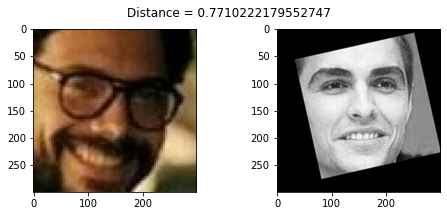

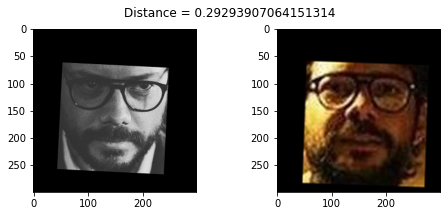

In [16]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2])}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(268, 3000)
show_pair(255, 256)

#### Create train and test sets (90:10 Train to Test ratio)

In [17]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [18]:
np.sum(train_idx)

9573

In [19]:
np.sum(test_idx)

1197

In [20]:
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

In [21]:
X_train.shape

(9573, 2622)

In [22]:
X_test.shape

(1197, 2622)

#### Label Encoding

In [23]:
targets = np.array([m.name for m in metadata])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(targets)

In [24]:
y_train = y[train_idx]
y_test  = y[test_idx]

In [25]:
np.unique(targets)

array(['pins_Aaron Paul', 'pins_Alvaro Morte', 'pins_Amanda Crew',
       'pins_Amaury Nolasco', 'pins_Anna Gunn',
       'pins_Benedict Cumberbatch', 'pins_Betsy Brandt',
       'pins_Brenton Thwaites', 'pins_Brit Marling',
       'pins_Bryan Cranston', 'pins_Caity Lotz', 'pins_Cameron Monaghan',
       'pins_Chance Perdomo', 'pins_Chris Evans', 'pins_Chris Pratt',
       'pins_Cobie Smulders', 'pins_Danielle Panabaker',
       'pins_Dave Franco', 'pins_Dominic Purcell', 'pins_Dwayne Johnson',
       'pins_Emilia Clarke', 'pins_Emily Bett Rickards',
       'pins_Emma Stone', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil',
       'pins_Jason Momoa', 'pins_Jeremy Renner', 'pins_Jesse Eisenberg',
       'pins_Jim Parsons', 'pins_Jon Bernthal', 'pins_Josh Radnor',
       'pins_Kit Harington', 'pins_Krysten Ritter',
       'pins_Kumail Nanjiani', 'pins_Maisie Williams',
       'pins_Mark Ruffalo', 'pins_Martin Starr', 'pins_Melissa benoit',
       'pins_Mike Colter', 'pins_Morena Baccarin', 'p

In [26]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [27]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

### Standardize the Feature values

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train)
print(X_train_scaled)

[[ 0.03497701 -0.00105061 -0.01248934 ... -0.0105309   0.00179322
   0.02439155]
 [ 0.02801891 -0.00112631 -0.0126575  ... -0.00904751 -0.00578403
   0.0212583 ]
 [ 0.01505303 -0.00503204 -0.00155374 ... -0.00577054 -0.0059326
   0.01585888]
 ...
 [ 0.00965872  0.0037216  -0.01345864 ... -0.01433405  0.01899945
   0.03899155]
 [ 0.0023093   0.00094764 -0.00544814 ... -0.01600495  0.01053975
   0.0368325 ]
 [ 0.01772302  0.01064051  0.01995194 ... -0.0261843   0.03288927
   0.0488265 ]]
[[ 2.52564283 -0.05998837 -1.46556132 ...  0.36845433 -0.39075277
   0.83708559]
 [ 1.79692725 -0.06640856 -1.48161031 ...  0.5078204  -1.10496206
   0.59647484]
 [ 0.43902318 -0.39769255 -0.42186081 ...  0.81569453 -1.1189659
   0.18183914]
 ...
 [-0.12591865  0.34479071 -1.55807135 ...  0.0111459   1.23105566
   1.95825827]
 [-0.89561688  0.10950331 -0.7935445  ... -0.1458365   0.43366915
   1.79245954]
 [ 0.71864803  0.93165177  1.63065373 ... -1.1021948   2.54026962
   2.71351008]]


### Dimensionality Reduction using PCA

In [29]:
covMatrix = np.cov(X_train_scaled,rowvar=False)
print(covMatrix)

[[ 1.00010447  0.1190614   0.11212236 ...  0.07831712 -0.12052832
  -0.25350846]
 [ 0.1190614   1.00010447  0.22992734 ... -0.03788629  0.28324408
   0.21235847]
 [ 0.11212236  0.22992734  1.00010447 ... -0.1101408   0.06444031
   0.03514267]
 ...
 [ 0.07831712 -0.03788629 -0.1101408  ...  1.00010447 -0.01797866
  -0.09188741]
 [-0.12052832  0.28324408  0.06444031 ... -0.01797866  1.00010447
   0.39490282]
 [-0.25350846  0.21235847  0.03514267 ... -0.09188741  0.39490282
   1.00010447]]


In [30]:
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [31]:
features = 2622

In [32]:
pca = PCA(n_components=features)
pca.fit(X_train)

PCA(n_components=2622)

In [33]:
print("Eigen Values :")
print(pca.explained_variance_)

Eigen Values :
[4.65557461e-02 1.43942724e-02 1.22560809e-02 ... 2.16165179e-11
 2.06233543e-11 2.02864621e-11]


In [34]:
print("Eigen Vectors :")
print(pca.components_)

Eigen Vectors :
[[-0.0205227   0.00828527 -0.0031499  ... -0.00731819  0.01948632
   0.04411833]
 [ 0.01331413 -0.00868746  0.00174472 ... -0.02119377 -0.01321167
   0.00838792]
 [ 0.00066869 -0.01162416 -0.02706666 ...  0.00541913 -0.01933218
  -0.03662069]
 ...
 [-0.00128664 -0.00133222 -0.00125499 ... -0.00085857 -0.00136781
  -0.00126212]
 [ 0.00417878  0.00450807  0.00455194 ...  0.00411943  0.00430056
   0.00421286]
 [ 0.00049713  0.00035774  0.00060886 ...  0.00027634  0.00066046
   0.00059253]]


In [35]:
print(" % variation according to each eigen Vector : ")
print(pca.explained_variance_ratio_)

 % variation according to each eigen Vector : 
[1.50184574e-01 4.64346047e-02 3.95369947e-02 ... 6.97329076e-11
 6.65290527e-11 6.54422692e-11]


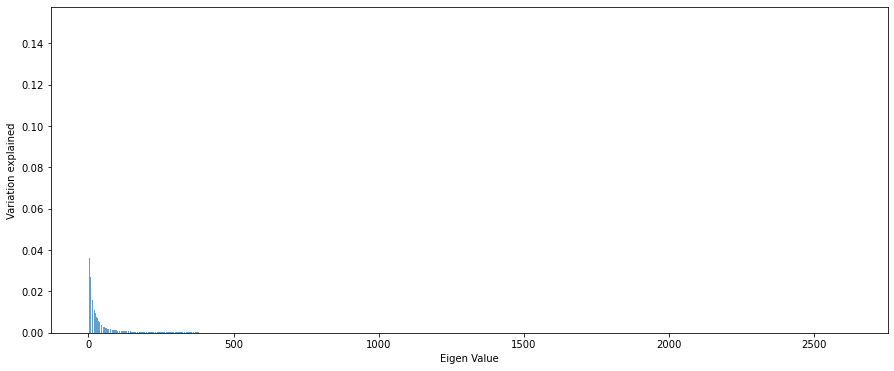

In [36]:
fig1 = plt.figure(figsize=(15,6))
plt.bar(list(range(1,(features+1))),pca.explained_variance_ratio_,alpha=0.7)
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

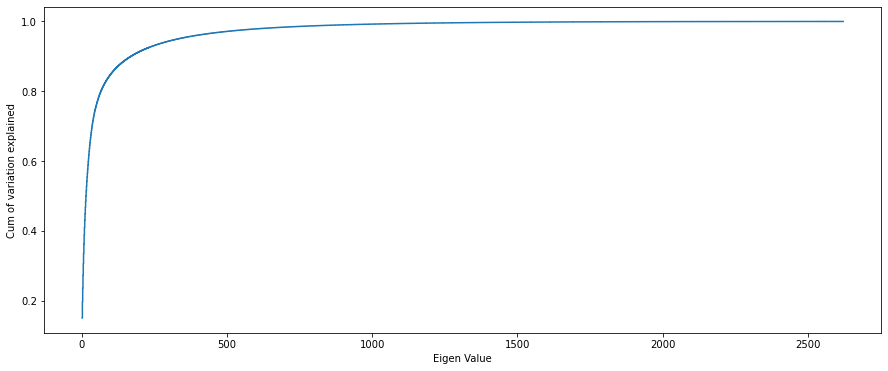

In [37]:
fig1 = plt.figure(figsize=(15,6))
plt.step(list(range(1,(features+1))),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

Text(0.5, 1.0, 'Selecting dimension with the Elbow Method')

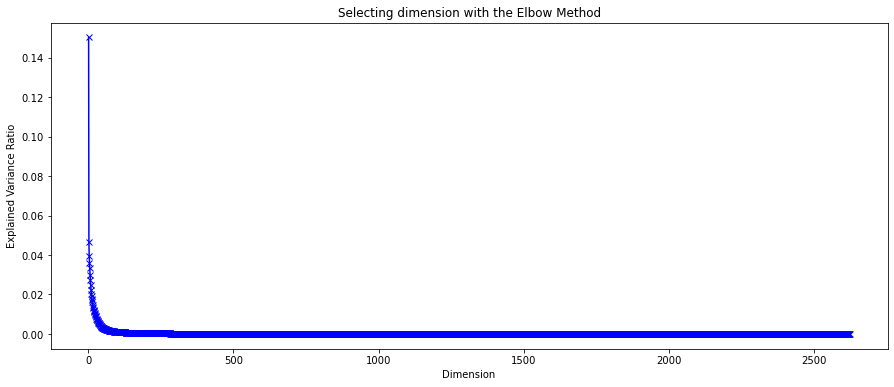

In [38]:
fig1 = plt.figure(figsize=(15,6))
plt.plot(list(range(1,(features+1))), pca.explained_variance_ratio_, 'bx-')
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.title('Selecting dimension with the Elbow Method')

In [39]:
# Set variable for the decided dimension
final_n_component = 100
# Taking the attribute count as per the decision.
pca_component = PCA(n_components=final_n_component, svd_solver='full')
pca_component.fit(X_train_scaled)
print(f"Eigen Values (with {final_n_component} PCA components):")
print("===========================================")
print(pca_component.explained_variance_)
print(f"Eigen Vectors (with {final_n_component} PCA components):")
print("=================================================")
print(pca_component.components_)
print(f"The percentage of variation explained by each eigen Vector (with {final_n_component} PCA components):")
print("==========================================================================================")
print(pca_component.explained_variance_ratio_)
# Transforming the dataset
pca_X_train = pca_component.transform(X_train_scaled)
pca_X_test = pca_component.transform(X_test_scaled)
pca_X_train

Eigen Values (with 100 PCA components):
[356.21409405 140.67215895 104.72697958  96.76038808  89.39190181
  82.35488591  67.5490735   61.60008261  55.08091575  50.60015111
  47.66401304  44.56119462  43.46828475  40.96743691  37.40259046
  35.89333015  34.22442348  32.05710319  30.13519833  29.71745783
  28.53407742  27.8782798   25.33258083  24.65305629  23.91361836
  23.04007243  21.91986001  20.28243381  20.11962506  19.30433643
  18.45199055  17.22609421  16.61645686  16.34440464  14.88408164
  14.08042632  13.93461685  13.49303829  13.16200681  12.74032731
  11.63507244  11.29491275  10.45223288  10.33146794   9.72435983
   9.31177868   9.05037162   8.74458212   8.55421599   8.35925351
   8.19377386   8.09738513   7.63728645   7.39209821   7.30138773
   7.13811028   7.09981431   6.91974651   6.59760214   6.57384915
   6.24321978   6.0619765    5.88973993   5.70148458   5.57663147
   5.37159339   5.28234955   5.09145872   4.95878321   4.83909702
   4.78073445   4.64880692   4.60195

array([[-1.39888293e+01,  1.74764054e+01, -1.28512040e+01, ...,
         2.83608740e-01,  2.36932461e+00, -8.64938814e-01],
       [-6.47306188e+00,  1.71557354e+01, -9.26045511e+00, ...,
         7.56727181e-01,  2.11189237e+00, -2.46053096e-03],
       [-1.79653434e+01,  5.89982294e+00, -3.99006988e+00, ...,
        -3.11441155e+00,  1.99792324e+00,  7.91578972e-01],
       ...,
       [ 2.08917551e+01, -2.14186522e+01, -1.80251993e+01, ...,
         2.62466750e+00, -6.90390699e-01, -1.38722649e+00],
       [ 1.69860557e+01, -2.16309371e+01, -1.28434964e+01, ...,
         1.16553033e+00, -1.04179572e+00,  7.28675461e-01],
       [ 3.80874320e+01, -1.78861485e+01,  2.87656225e+00, ...,
        -3.05282342e+00, -4.24863766e+00, -3.25873912e-01]])

#### Building SVM Classifier

In [40]:
pca_svm = SVC(C = 0.01, kernel = 'linear', gamma= "scale")
pca_svm.fit(pca_X_train, y_train)

SVC(C=0.01, kernel='linear')

In [41]:
pca_svm.score(pca_X_test, y_test)

0.9598997493734336

#### Prediction on the Test Image

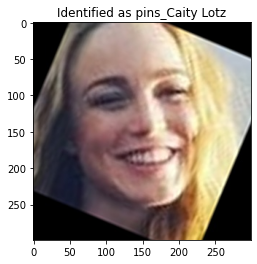

In [109]:
example_idx = 229

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = pca_svm.predict([pca_X_test[example_idx]])
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

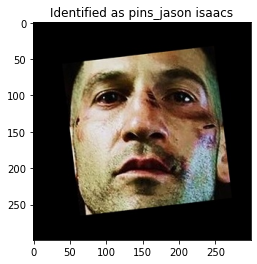

In [42]:
example_idx = 631

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = pca_svm.predict([pca_X_test[example_idx]])
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

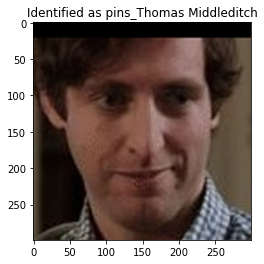

In [43]:
example_idx = 1100

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = pca_svm.predict([pca_X_test[example_idx]])
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [54]:
import os
#os.chdir('C:\\Users\\Dell\\Desktop')
os.getcwd()

'C:\\Users\\Dell\\Desktop'

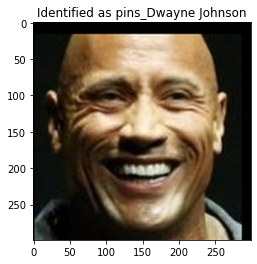

In [56]:
i = np.zeros((metadata.shape[0], 2622))
test_image = load_image("DwayneJohnson_TestImage.jpg")
test_image_1 = load_image("DwayneJohnson_TestImage.jpg")
test_image = (test_image / 255.).astype(np.float32)
test_image = cv2.resize(test_image, dsize = (224, 224))
i[0] = vgg_face_descriptor.predict(np.expand_dims(test_image, axis=0))[0]
test_image = scaler.fit_transform(i)
test_image = pca_component.transform(test_image)
test_prediction = pca_svm.predict([test_image[0]])
test_identity = label_encoder.inverse_transform(test_prediction)[0]

plt.imshow(test_image_1)
plt.title(f'Identified as {test_identity}');

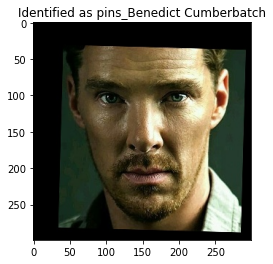

In [57]:
i = np.zeros((metadata.shape[0], 2622))
test_image = load_image("BenedictCumberbatch_TestImage.jpg")
test_image_1 = load_image("BenedictCumberbatch_TestImage.jpg")
test_image = (test_image / 255.).astype(np.float32)
test_image = cv2.resize(test_image, dsize = (224, 224))
i[0] = vgg_face_descriptor.predict(np.expand_dims(test_image, axis=0))[0]
test_image = scaler.fit_transform(i)
test_image = pca_component.transform(test_image)
test_prediction = pca_svm.predict([test_image[0]])
test_identity = label_encoder.inverse_transform(test_prediction)[0]

plt.imshow(test_image_1)
plt.title(f'Identified as {test_identity}');

# Conclusion of Part 2:
- This dataset contains 10,770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library
- Through the course of this part of the project we used the VGG Data set and accurately incorporated the weights assigned
- We calculated the distance between images using the distance() function and the use of embeddings
- Our train:test ratio was 90:10
- Dimensionality Reduction through PCA (Principal Component Analysis) was carried out
- The Eigen Values as shown through the three graphs displayed all indicate a sharp decline in the eigenvalues after 100 is reached is very very negligible after reaching 400
- The PCA_SVM score displayed is ~0.959
- The model has correctly predicted the images as Dwayne Johnson & Benedict Cumberbatch

# --------------------------------- END OF PROJECT ------------------------------